In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Essential Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from timeit import default_timer as timer
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Data Mining/Project/hotel_bookings.csv')

dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Part I

**Here i want to Exploratory on the data which we have**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
#children: NA -> 0
#country: NA -> 'N.A.'
#agent: NA -> 0
#company: NA -> 0

dataset.fillna({'children' : 0, 'country' : 'N. A.', 'agent' : 0, 'company' : 0}, inplace = True)

In [7]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**distribution of reservations for each hotel**

,hotel,reservations,cancelations
0,Resort Hotel,40060,11122
1,City Hotel,79330,33102


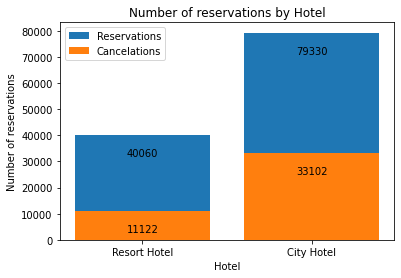

In [8]:


def auto_label(ax, container):
    for c in container:
        height = c.get_height()
        
        ax.annotate('{}'.format(height),
                    xy = (c.get_x() + c.get_width() / 2, height - 10000 ),
                    xytext = (0, 3),  #3 points vertical offset
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

def show_number_reservations():
    dict = []
    
    for hotel in dataset.hotel.unique():
        dict.append({'hotel' : hotel, 
                     'reservations' : len(dataset.loc[dataset.hotel == hotel, 'hotel']), 
                     'cancelations' : len(dataset.loc[(dataset.hotel == hotel) & (dataset.is_canceled == 1), 'hotel'])})
    
    data = pd.DataFrame(dict)
    
    fig, ax = plt.subplots()
    
    reserv_bar = ax.bar(data.hotel, data.reservations, label = 'Reservations')
    cancel_bar = ax.bar(data.hotel, data.cancelations, label = 'Cancelations')
            
    plt.title('Number of reservations by Hotel')
    plt.xlabel('Hotel')
    plt.ylabel('Number of reservations')
    plt.legend()

    auto_label(ax, reserv_bar)
    auto_label(ax, cancel_bar)
    
    return data

show_number_reservations()

**Compare each attribute with cancellation rate to find which attribute has the most effect on cancellation!**

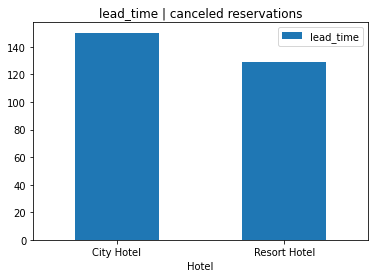

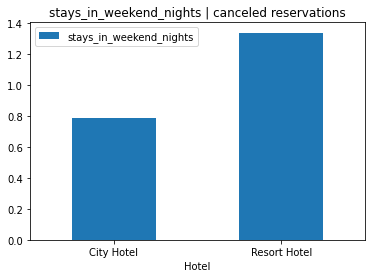

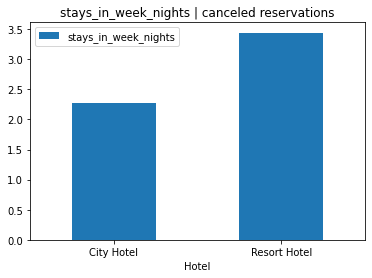

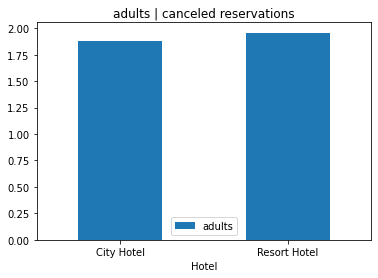

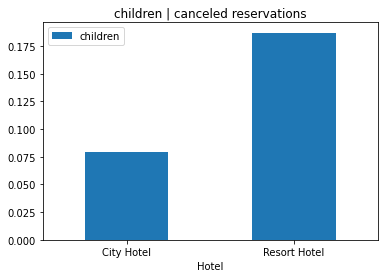

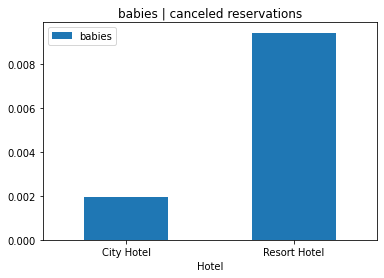

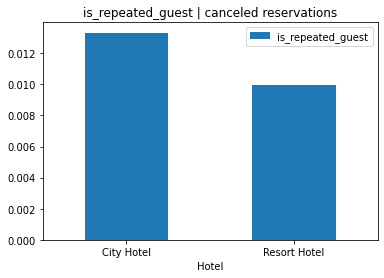

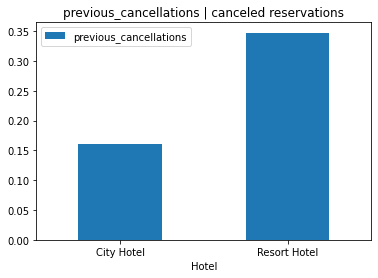

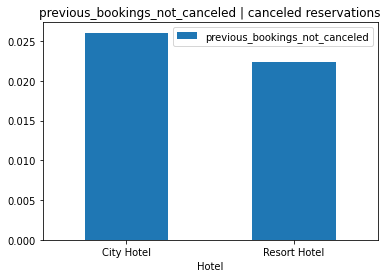

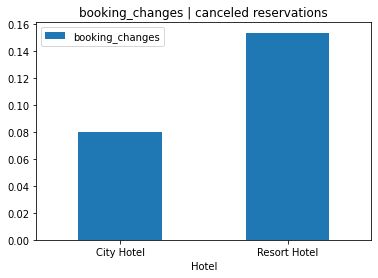

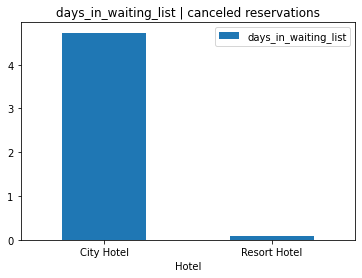

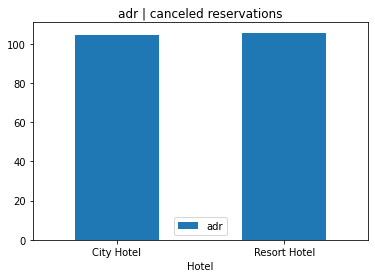

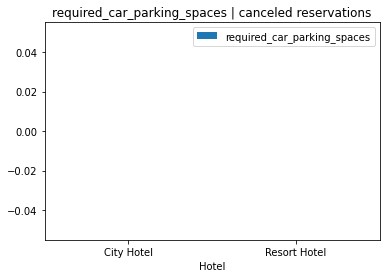

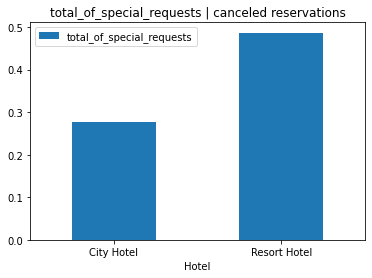

,hotel,attribute,value
0,City Hotel,lead_time,150.281222
1,Resort Hotel,lead_time,128.680543
2,City Hotel,stays_in_weekend_nights,0.787505
3,Resort Hotel,stays_in_weekend_nights,1.335281
4,City Hotel,stays_in_week_nights,2.266781
5,Resort Hotel,stays_in_week_nights,3.440299
6,City Hotel,adults,1.882907
7,Resort Hotel,adults,1.957741
8,City Hotel,children,0.079451
9,Resort Hotel,children,0.187017


In [9]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

def show_attributes(canceled, attributes):
    dict = []
    
    for attr in attributes:        
        data = dataset.loc[dataset.is_canceled == (1 if canceled else 0), ['hotel', attr]]\
                      .groupby('hotel').agg(['mean']).reset_index()
        
        for i in range(len(dataset.hotel.unique())):
            dict.append({'hotel' : data.iat[i, 0], 'attribute' : attr, 'value' : data.iat[i, 1]})
    
    result = pd.DataFrame(dict)
    
    for attr in attributes:
        ax = result.loc[result.attribute == attr].plot('hotel', 'value', kind = 'bar', label = attr)
        ax.set_title(attr + (' | canceled reservations' if canceled else ''))
        ax.set_xlabel('Hotel')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'center')
        plt.show()
    
    return result

show_attributes(True, attrs)

**Show list of attributes by thier values**

In [10]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
         'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
         'deposit_type', 'agent', 'company', 'customer_type']

def list_attributes(canceled, attributes):
    dict = []

    for attr in attributes:        
        data = dataset.loc[dataset.is_canceled == (1 if canceled else 0), ['hotel', attr]]

        operation = 'count' if data.dtypes[attr] == np.object else 'mean'
            
        data = data.groupby('hotel').agg([operation]).reset_index()

        for i in range(len(dataset.hotel.unique())):
            dict.append({'hotel' : data.iat[i, 0], 'attribute' : attr, 'type': operation, 'value' : data.iat[i, 1]})

    return pd.DataFrame(dict)

list_attributes(True, attrs)

,hotel,attribute,type,value
0,City Hotel,lead_time,mean,150.281222
1,Resort Hotel,lead_time,mean,128.680543
2,City Hotel,stays_in_weekend_nights,mean,0.787505
3,Resort Hotel,stays_in_weekend_nights,mean,1.335281
4,City Hotel,stays_in_week_nights,mean,2.266781
5,Resort Hotel,stays_in_week_nights,mean,3.440299
6,City Hotel,adults,mean,1.882907
7,Resort Hotel,adults,mean,1.957741
8,City Hotel,children,mean,0.079451
9,Resort Hotel,children,mean,0.187017


**Compare pairs of attributes to find effective attributes!**

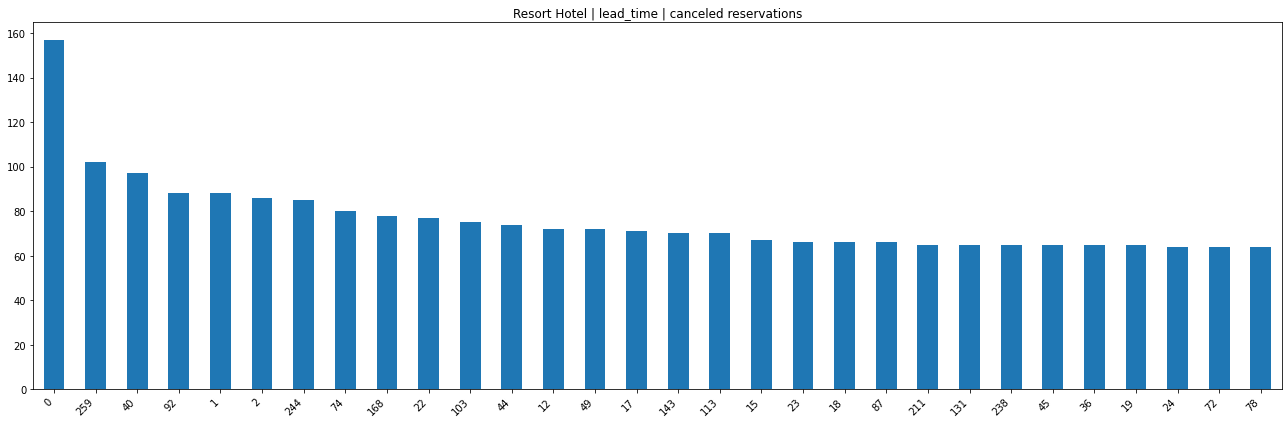

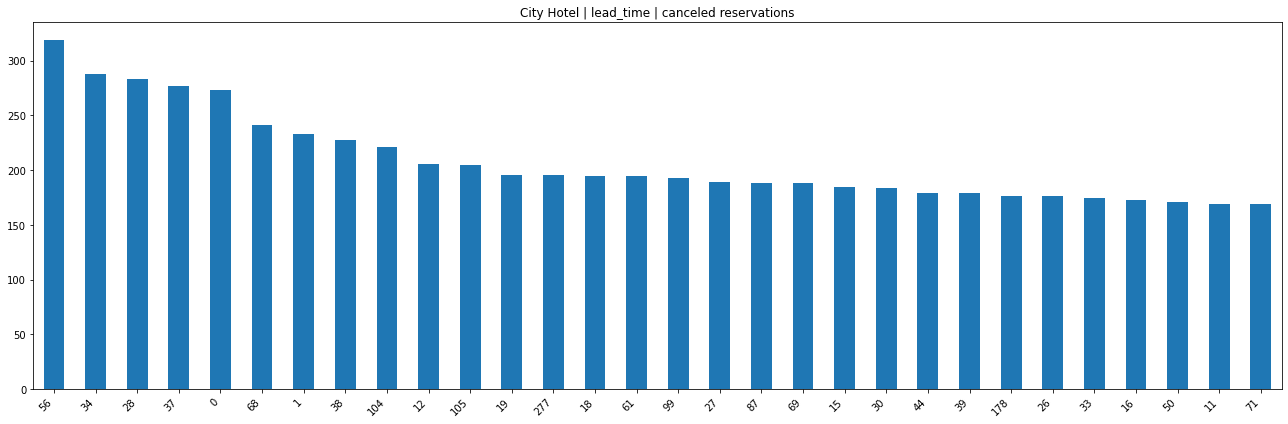

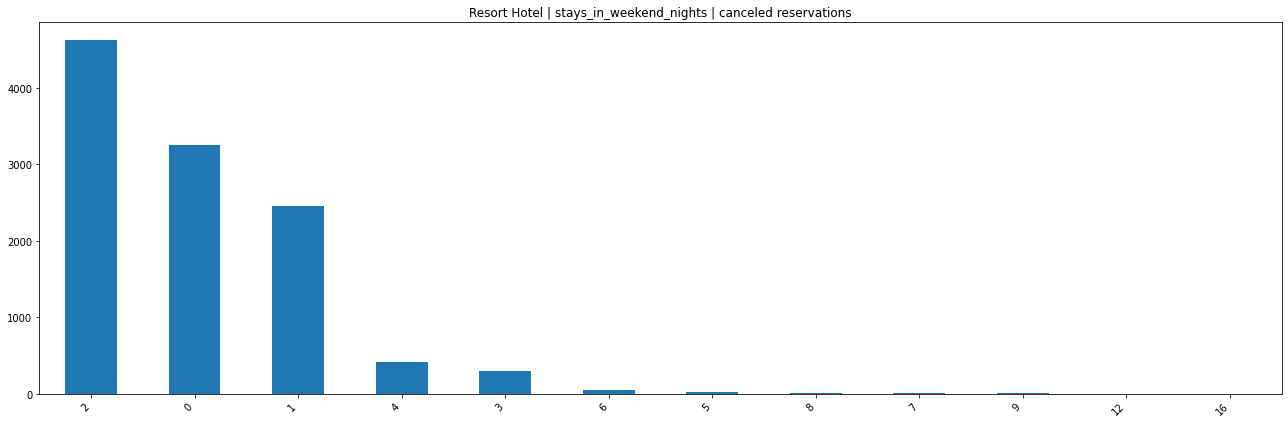

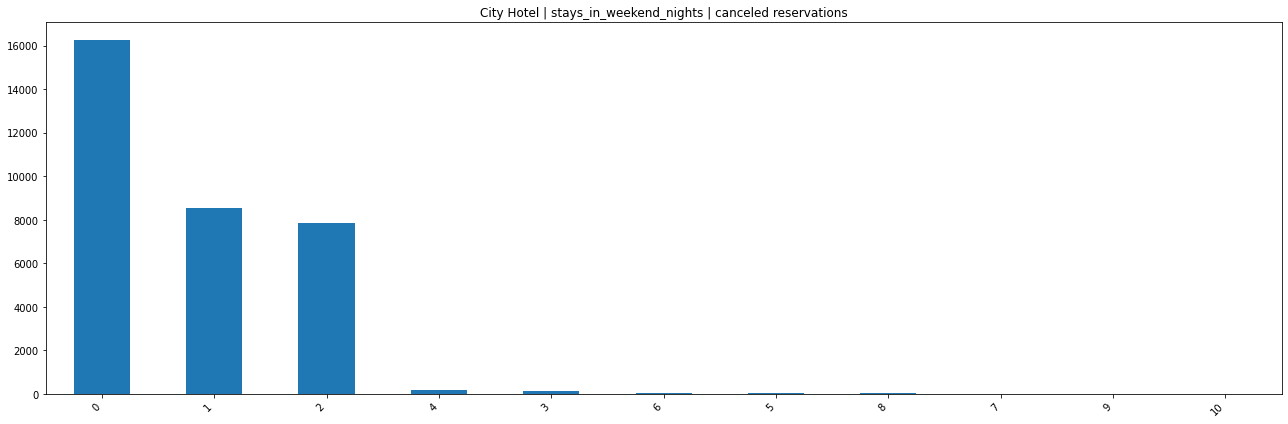

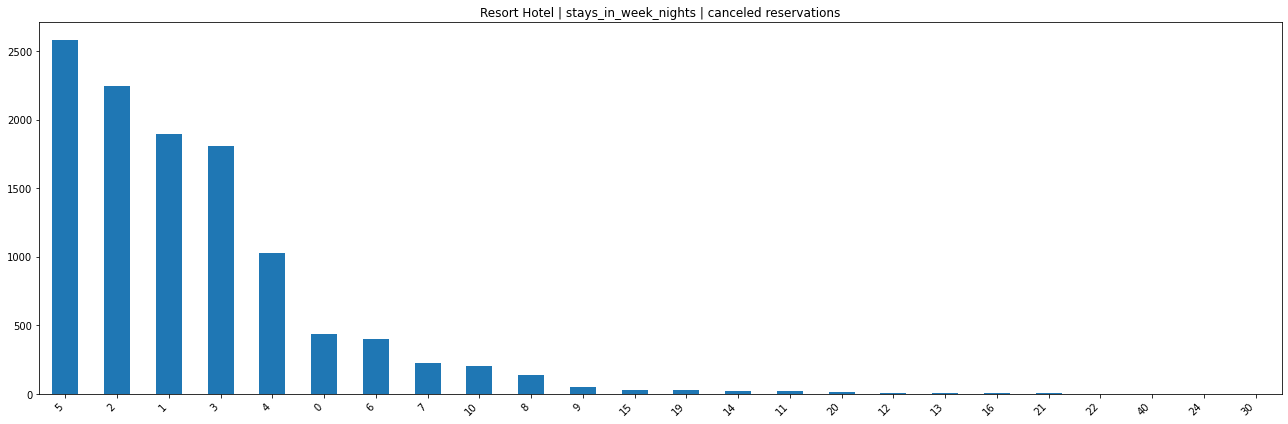

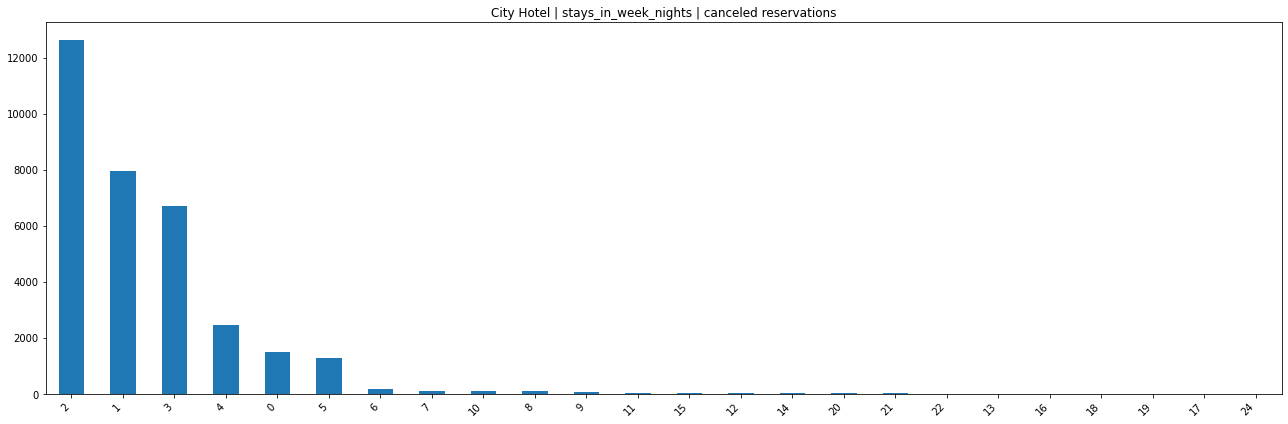

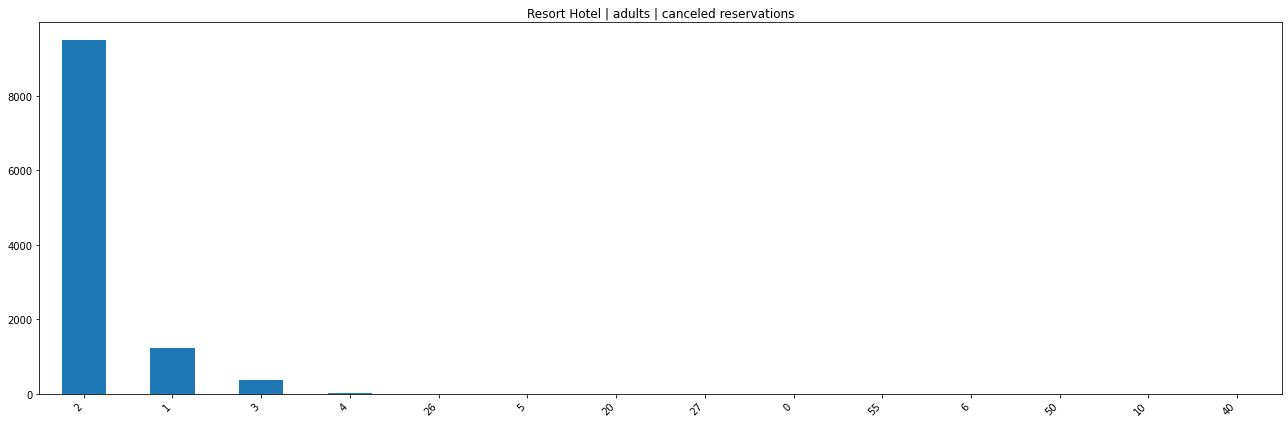

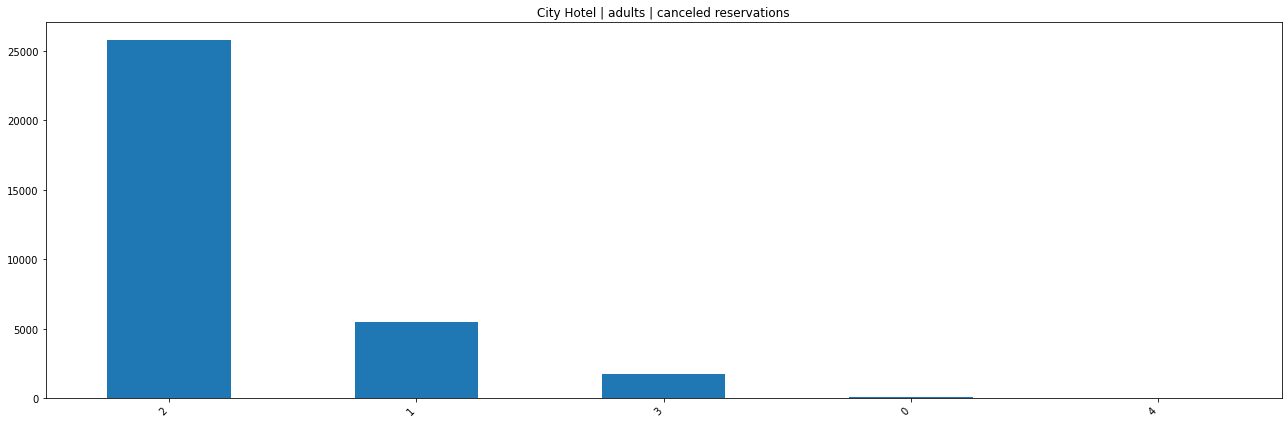

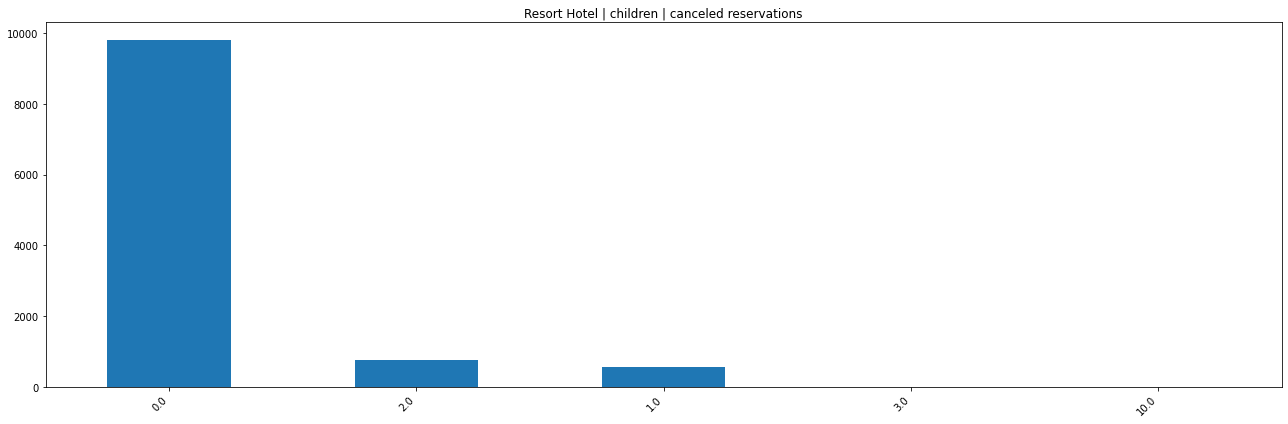

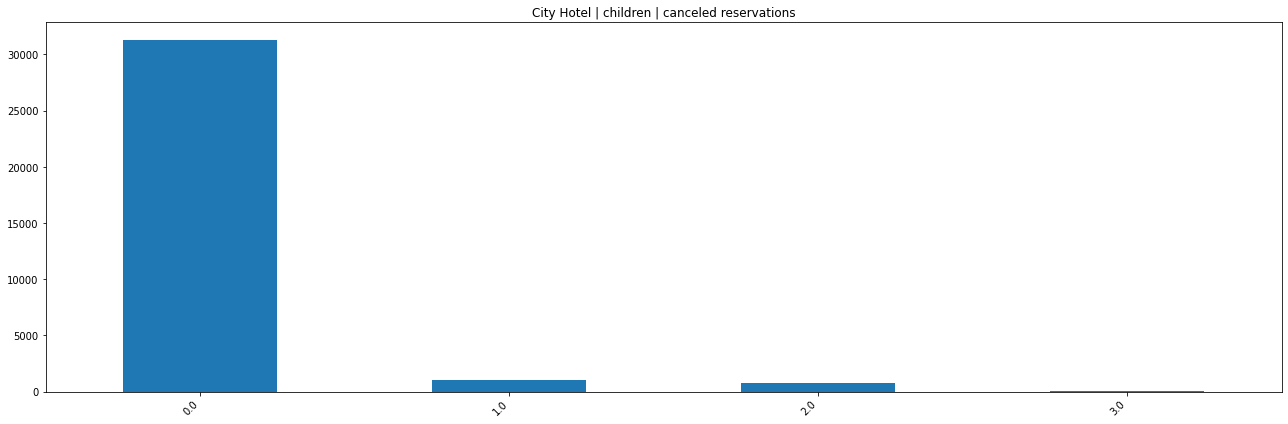

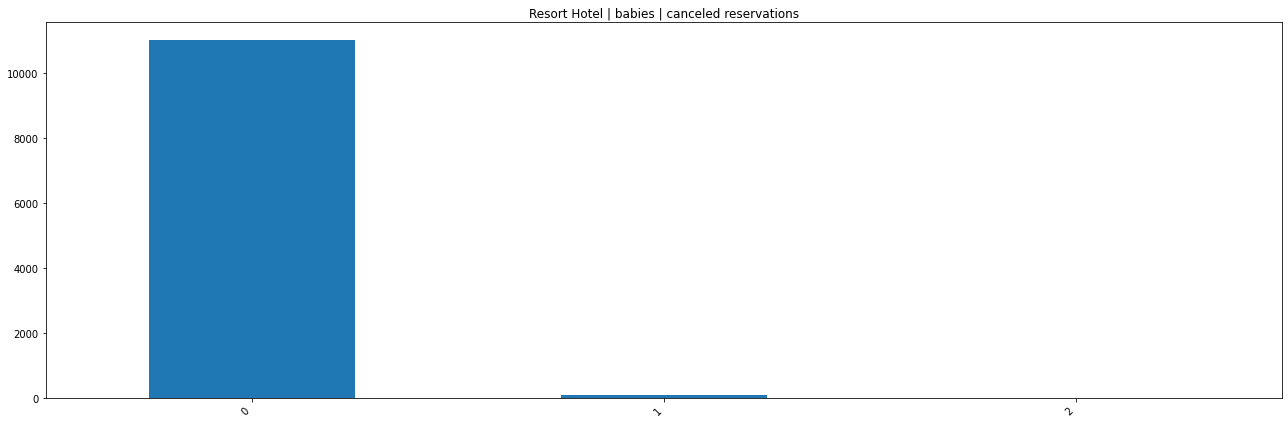

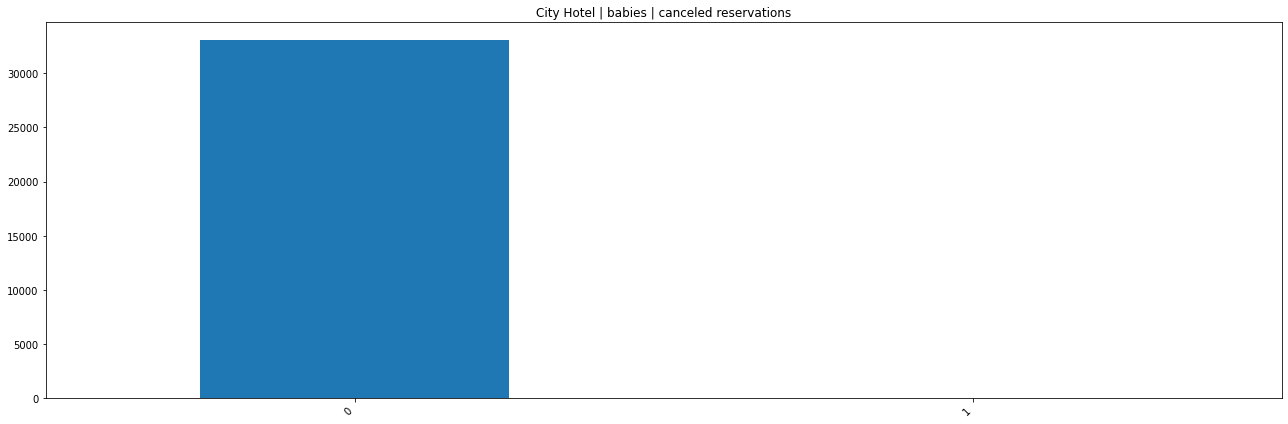

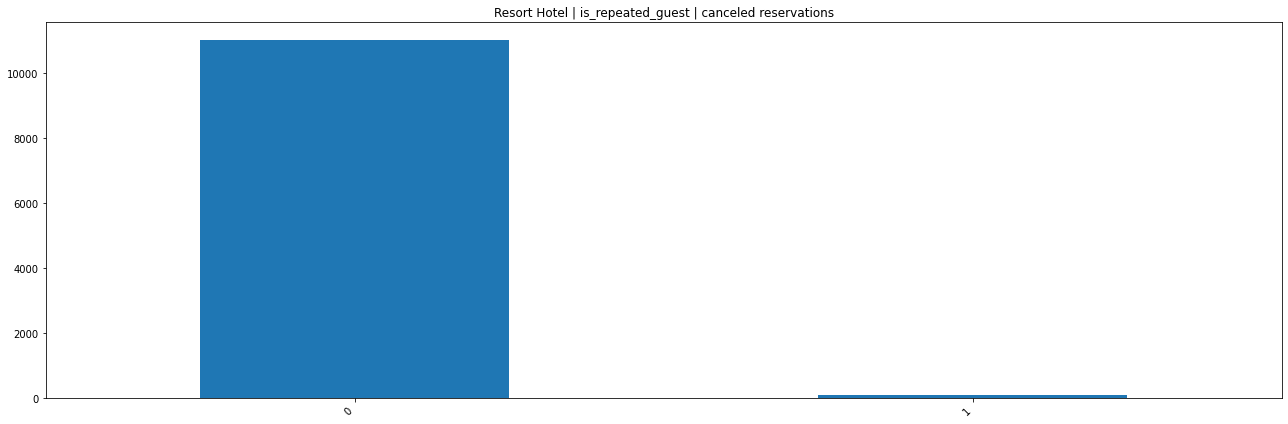

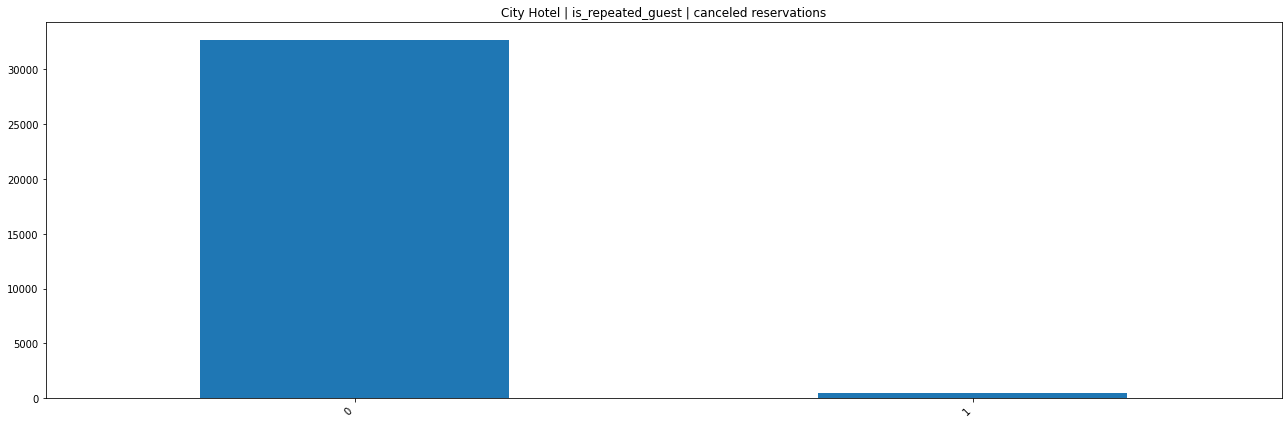

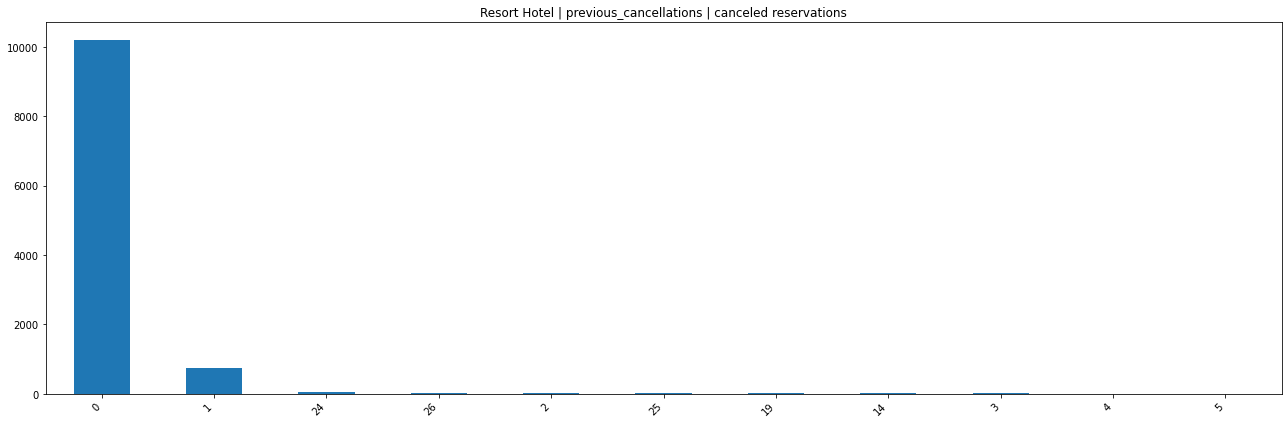

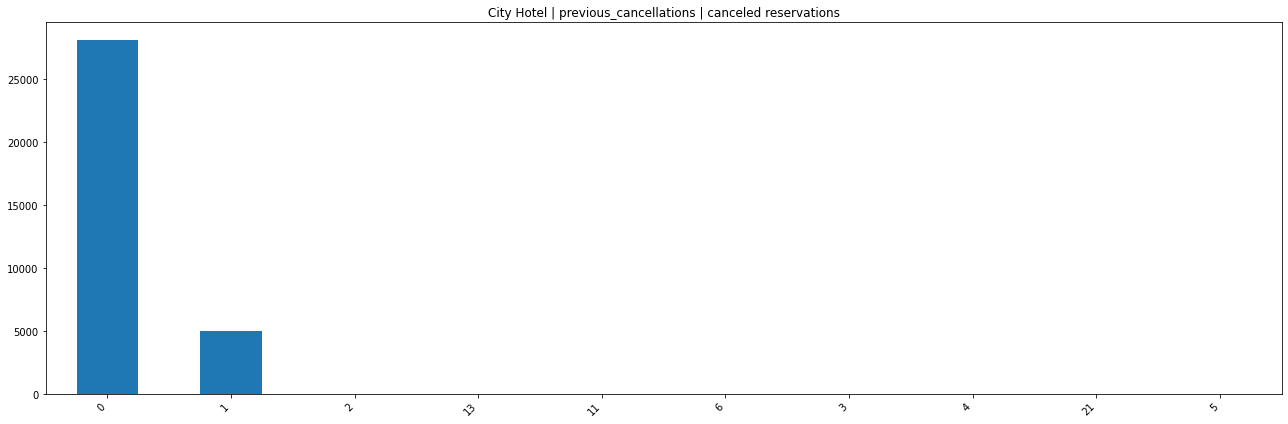

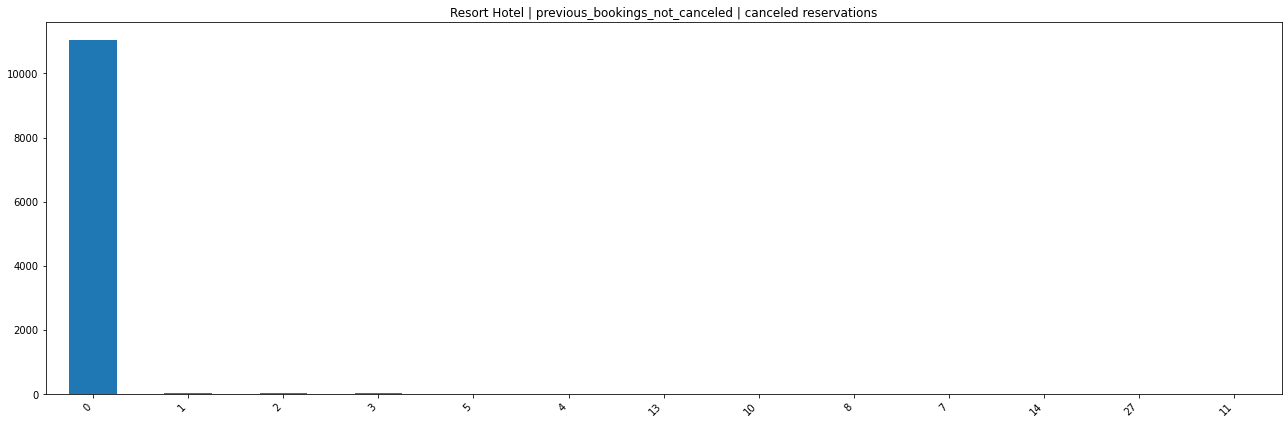

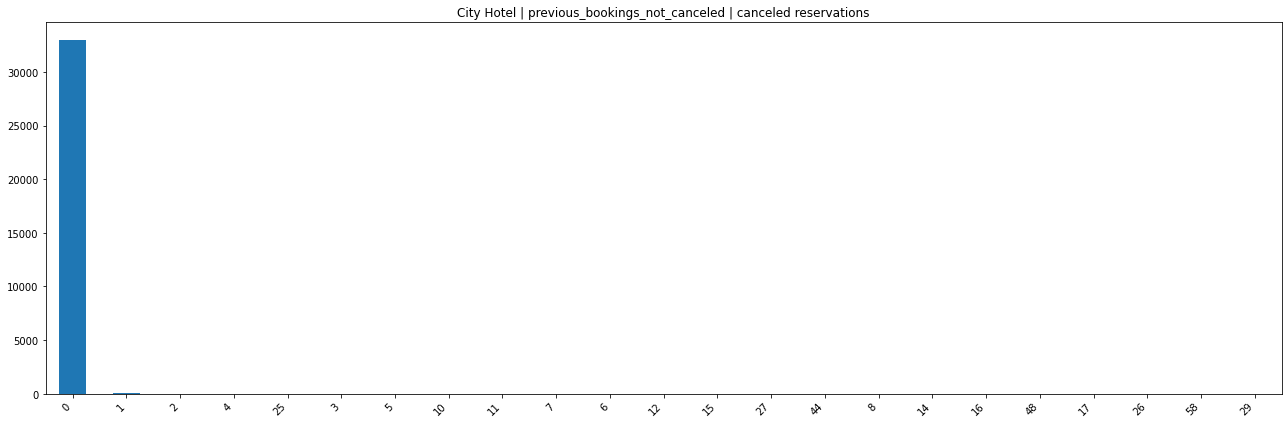

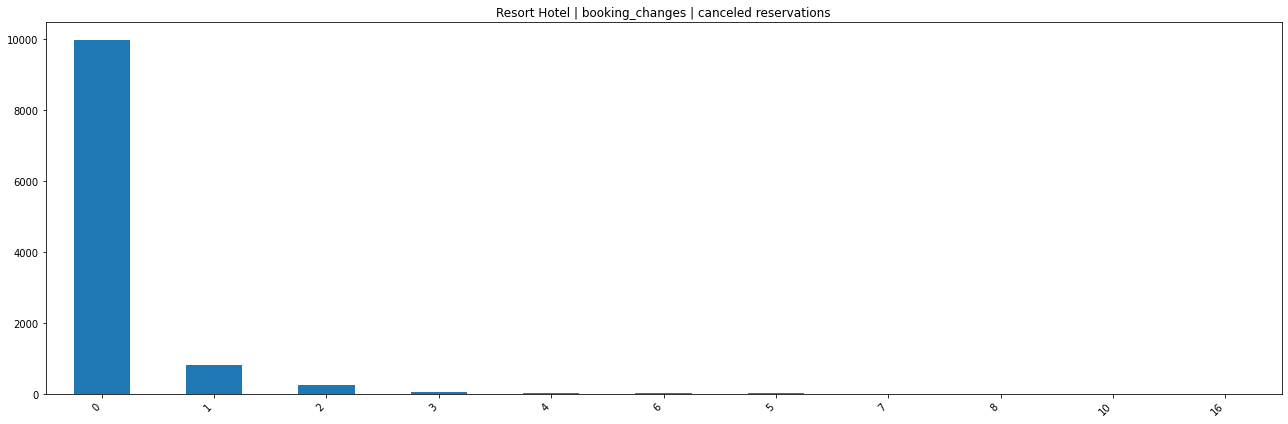

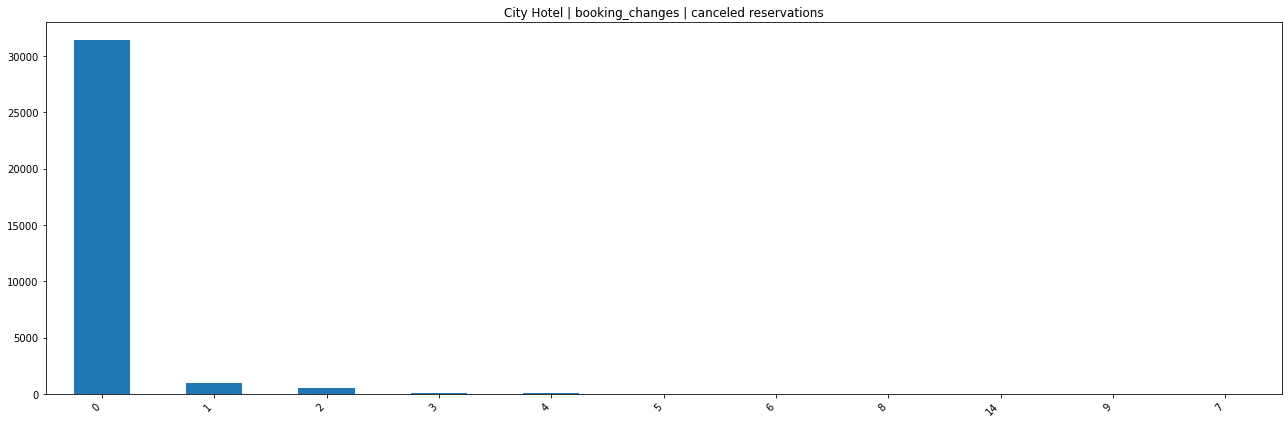

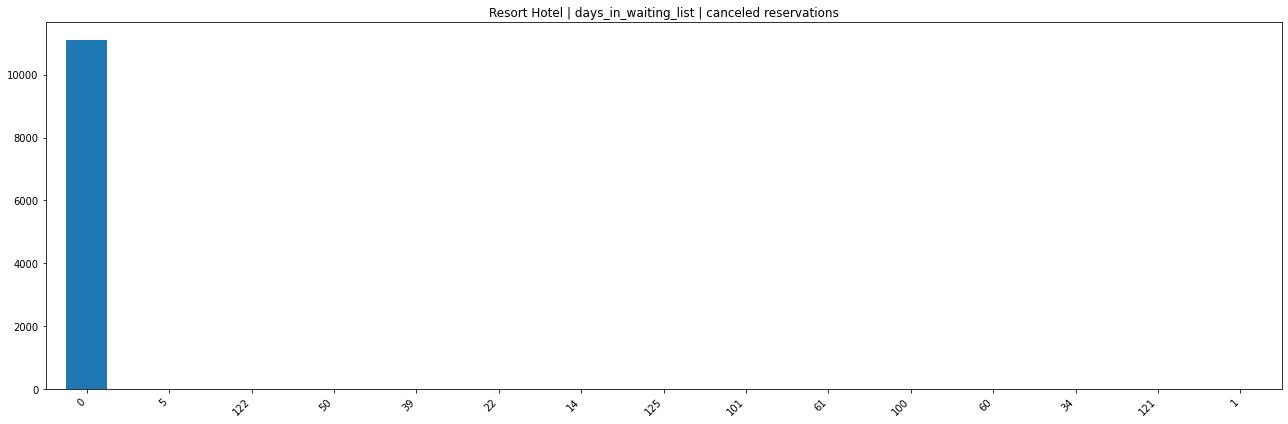

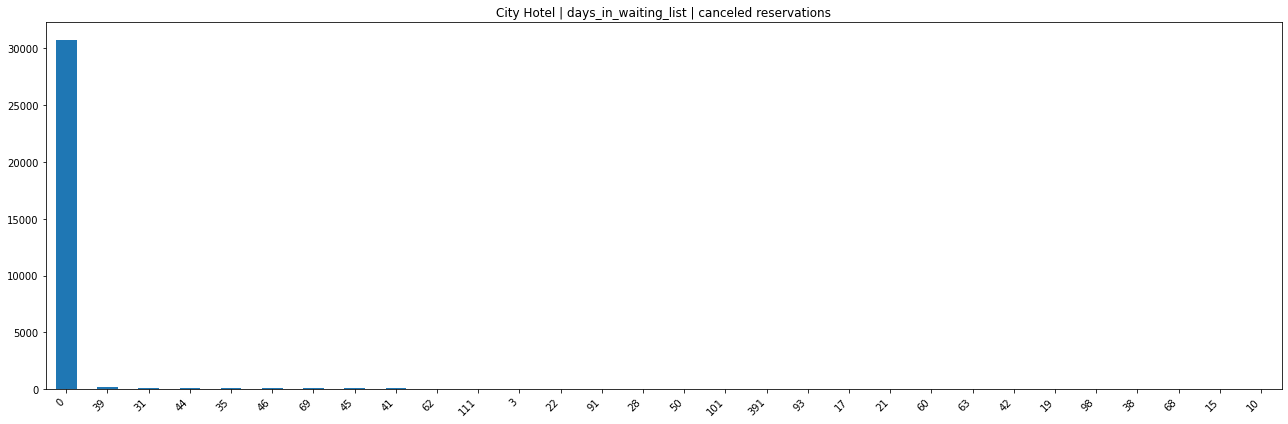

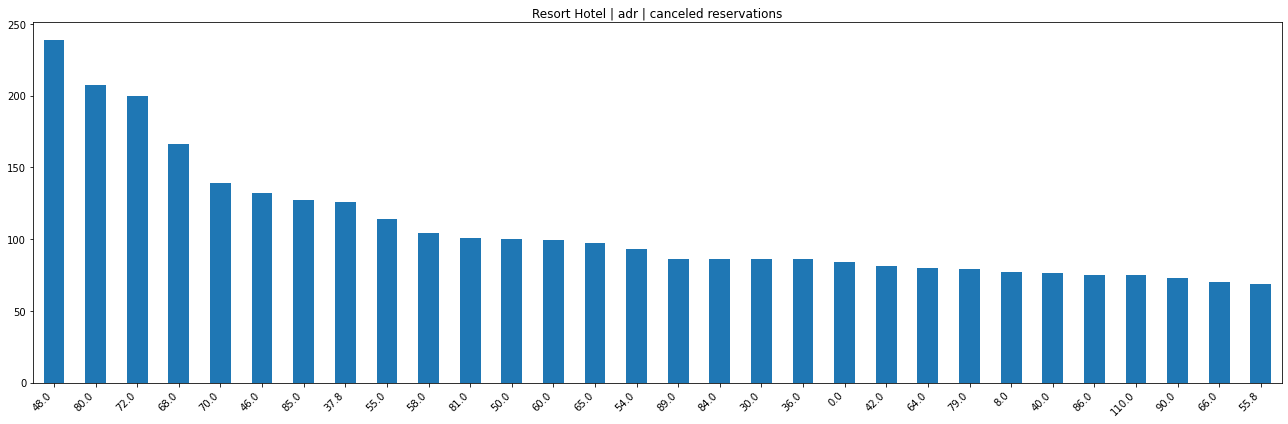

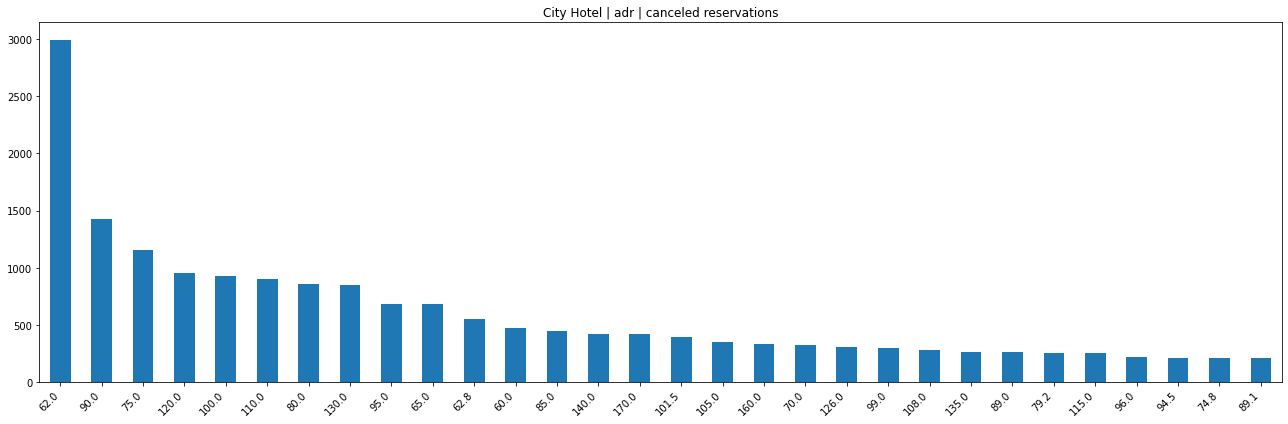

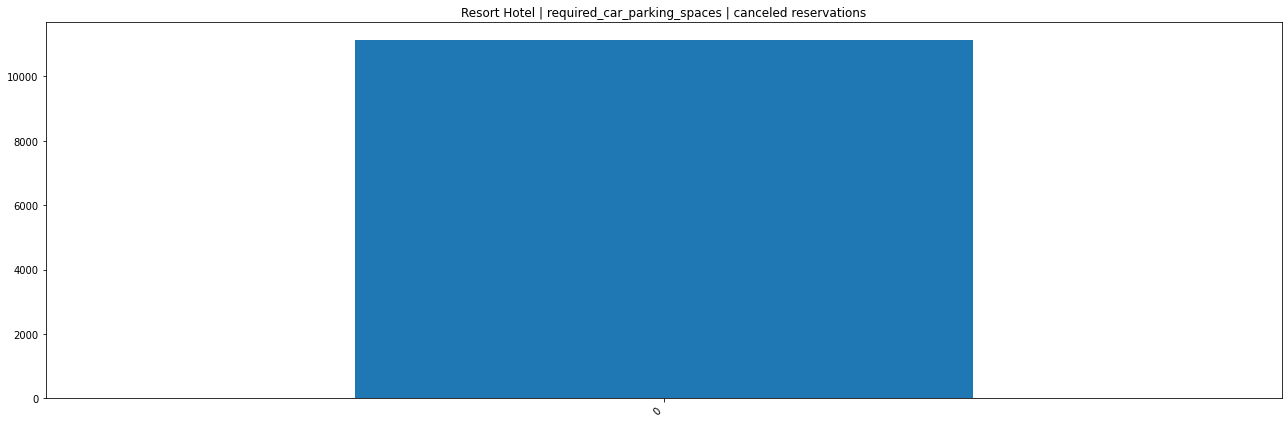

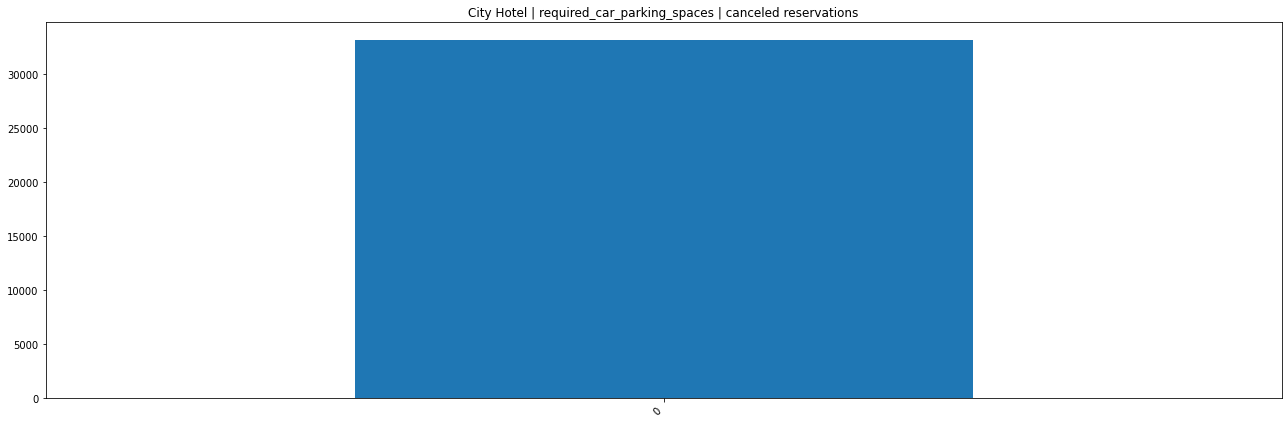

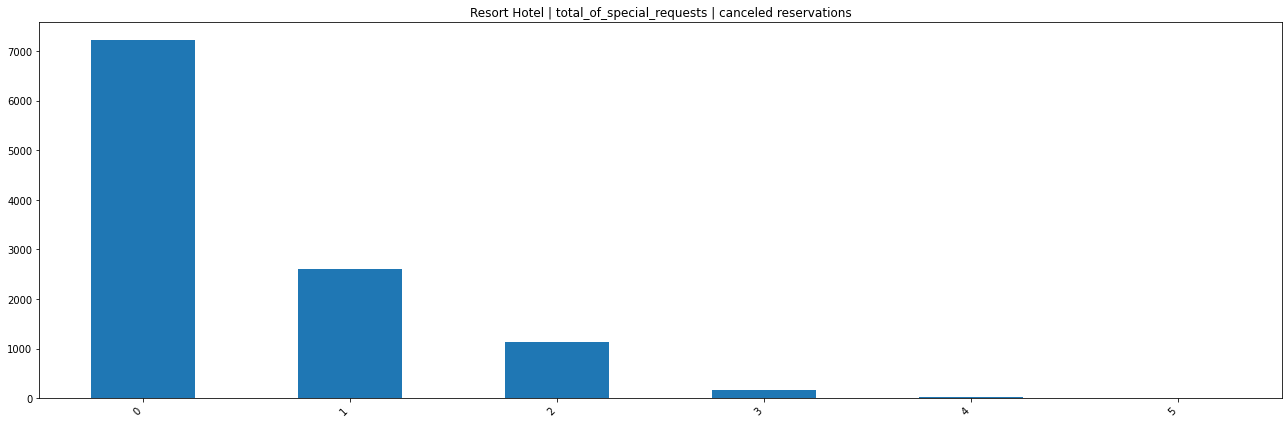

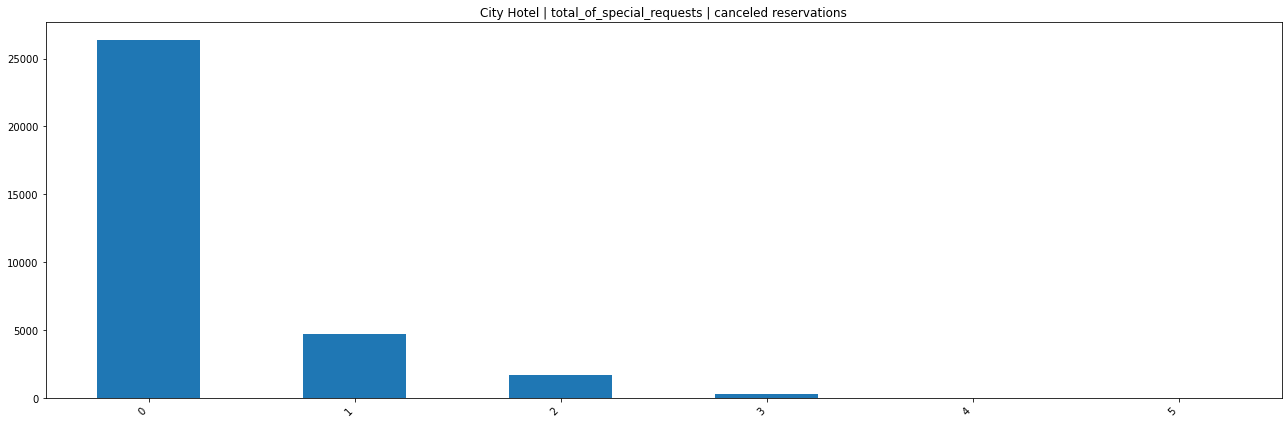

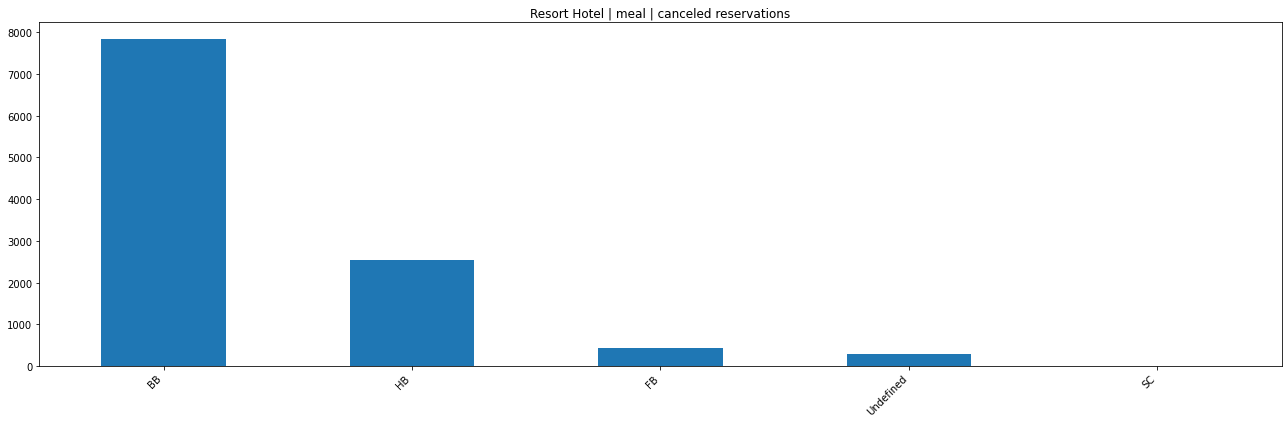

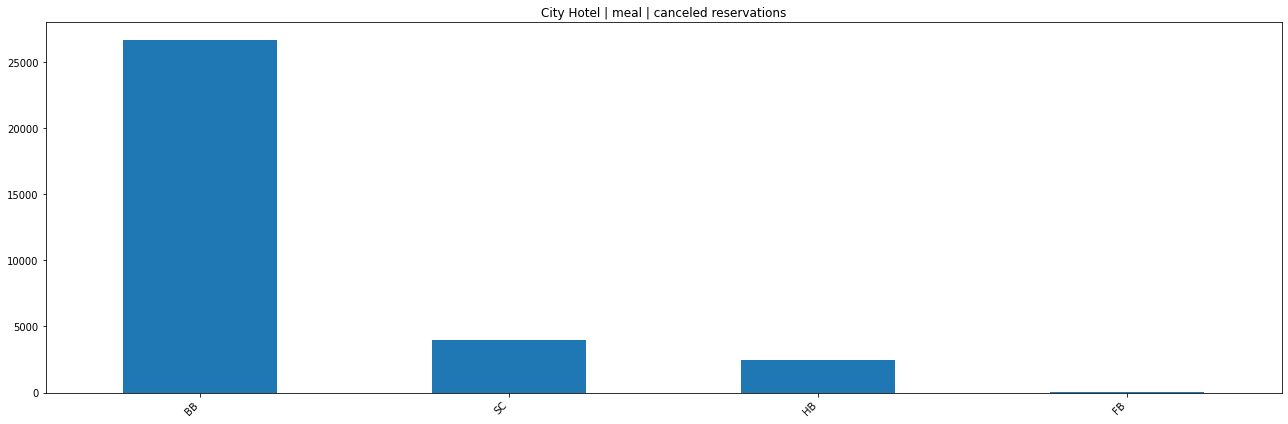

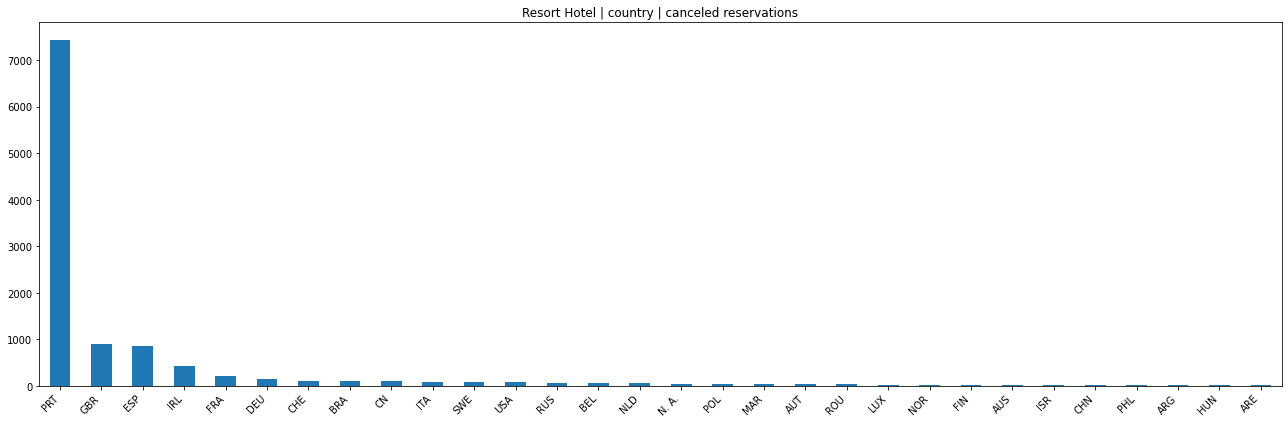

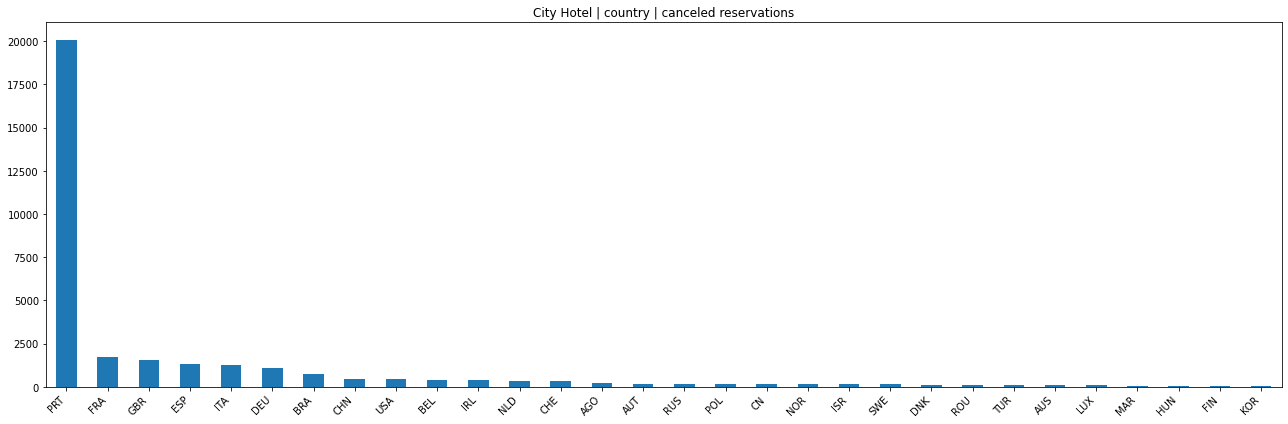

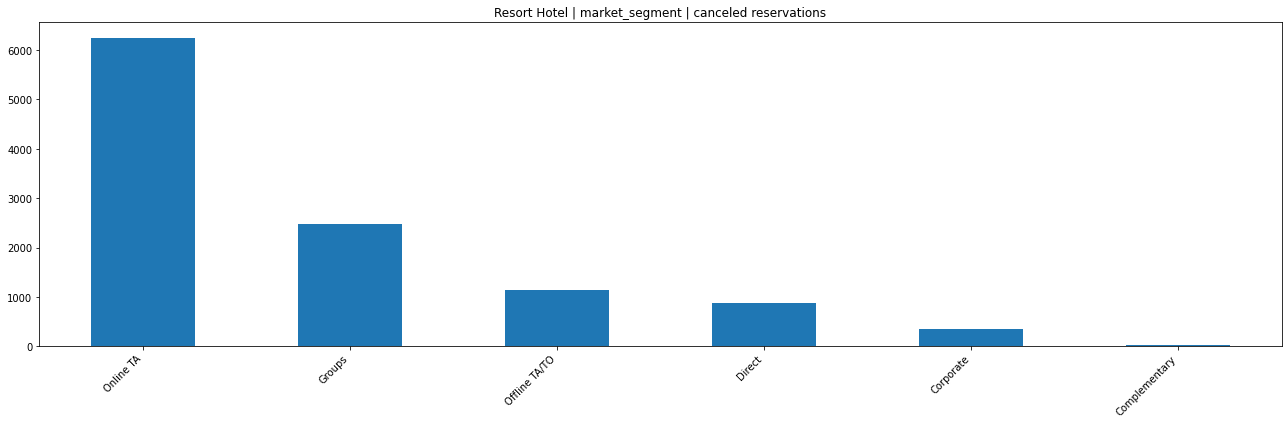

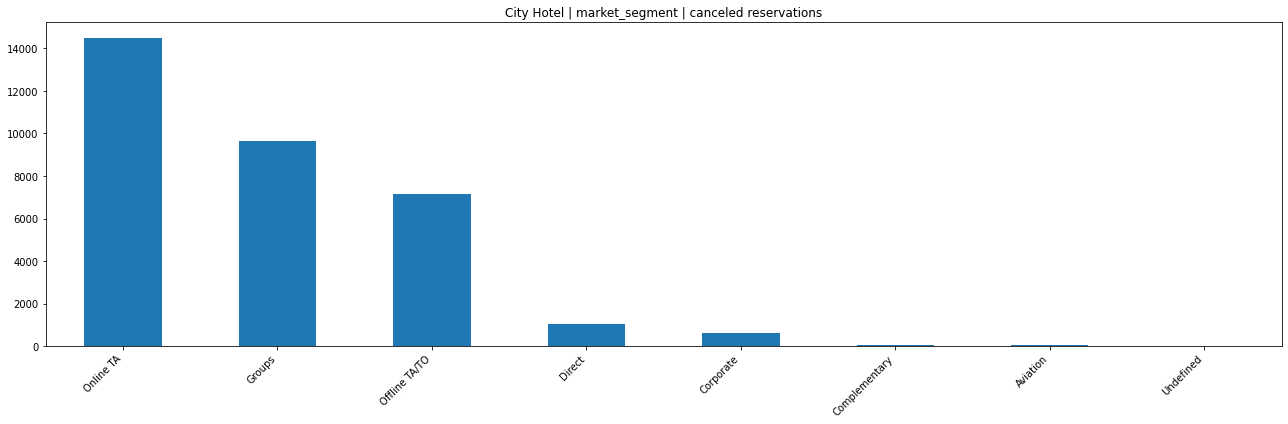

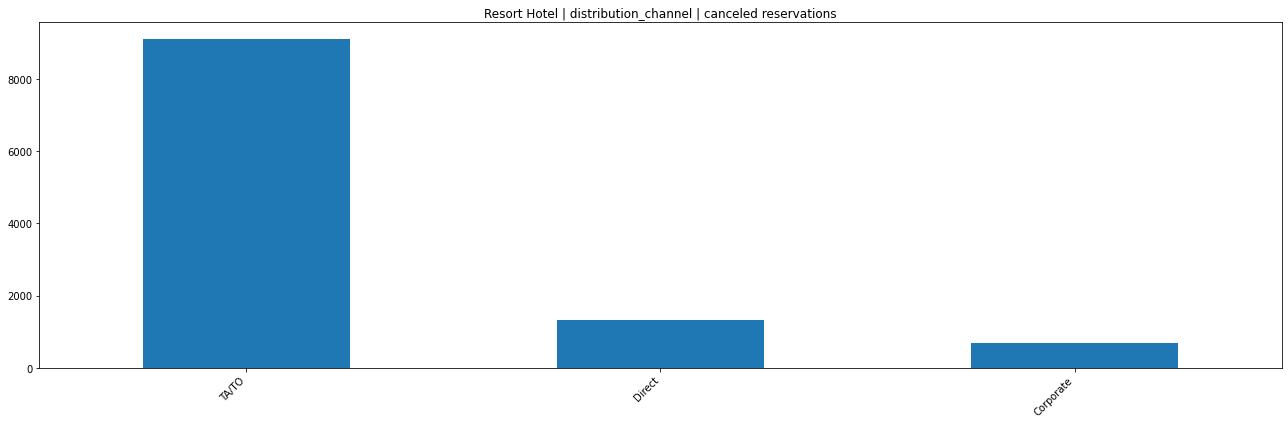

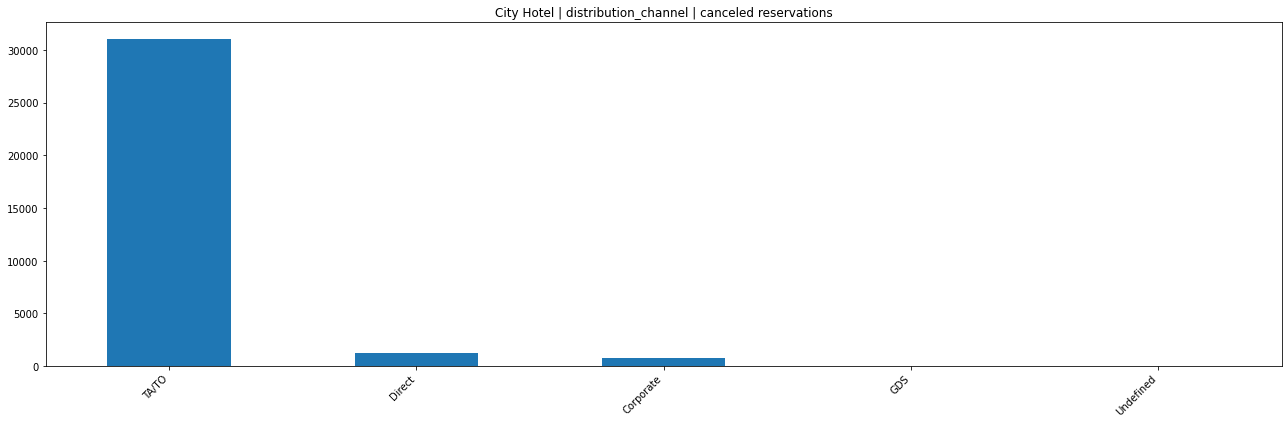

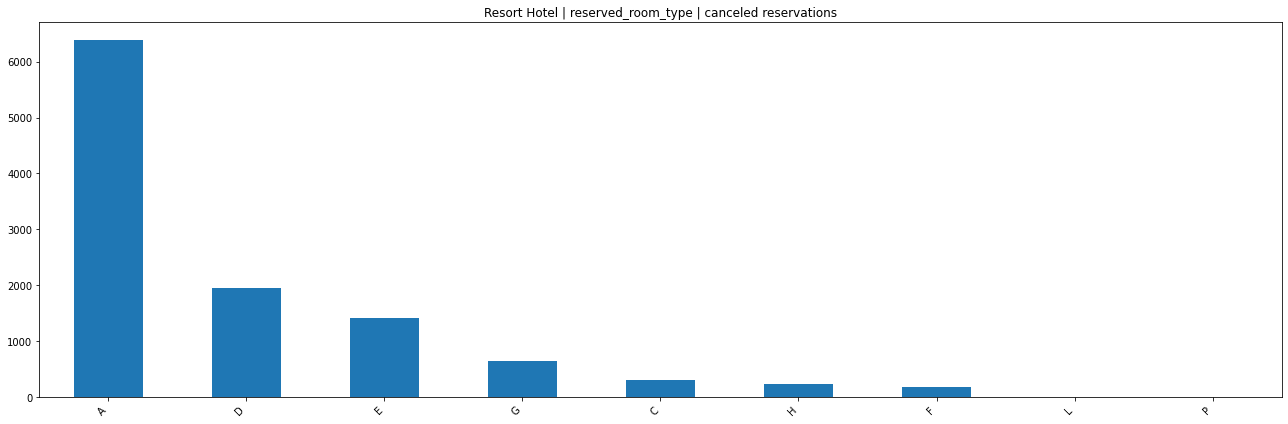

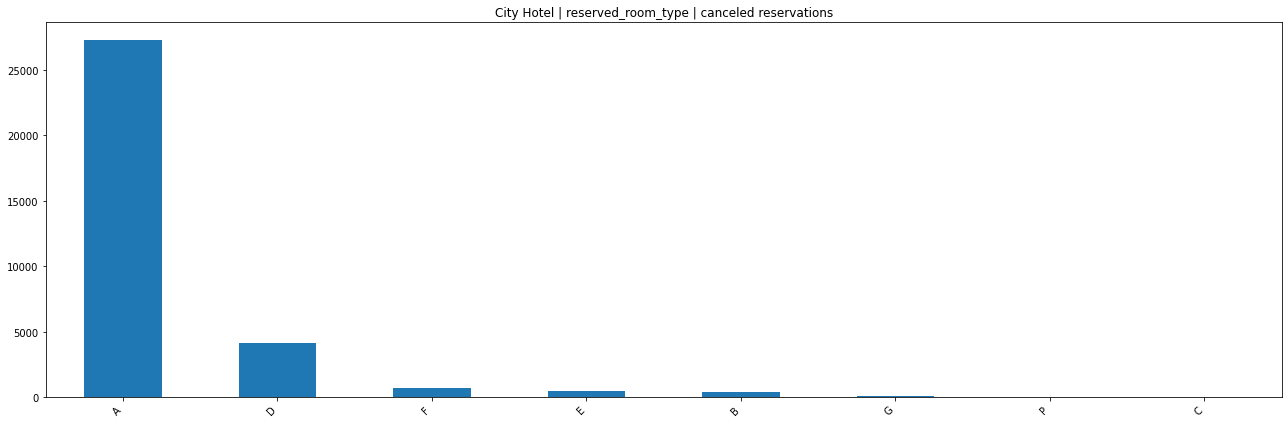

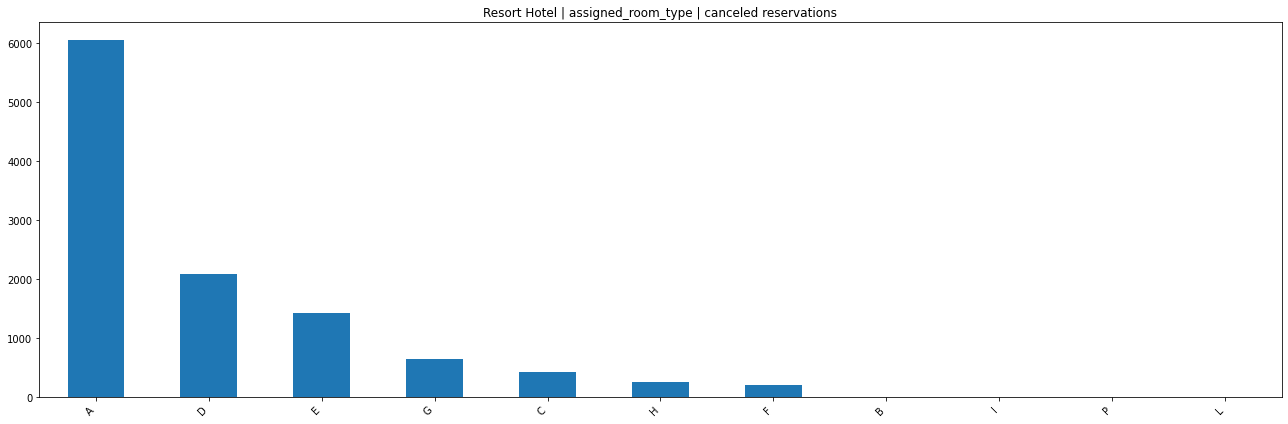

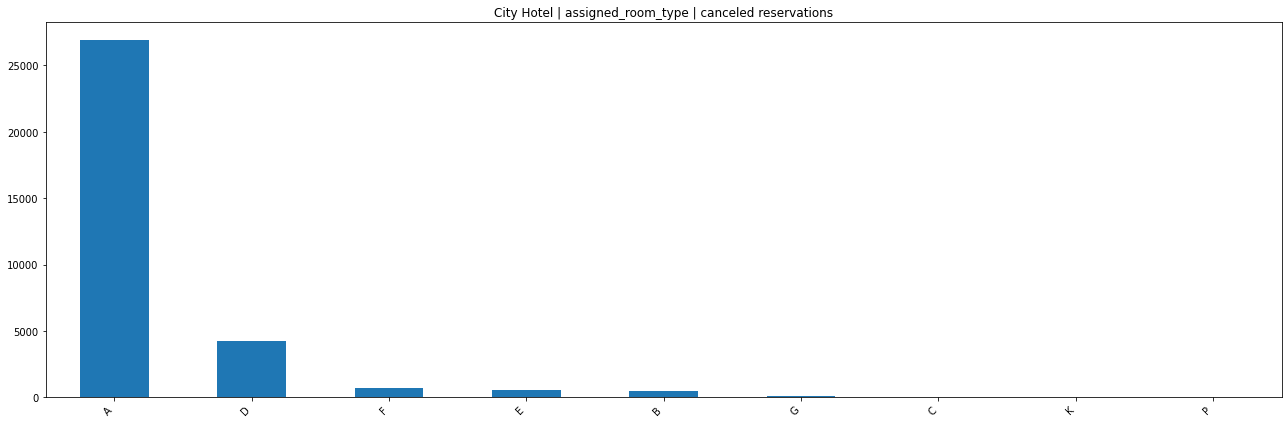

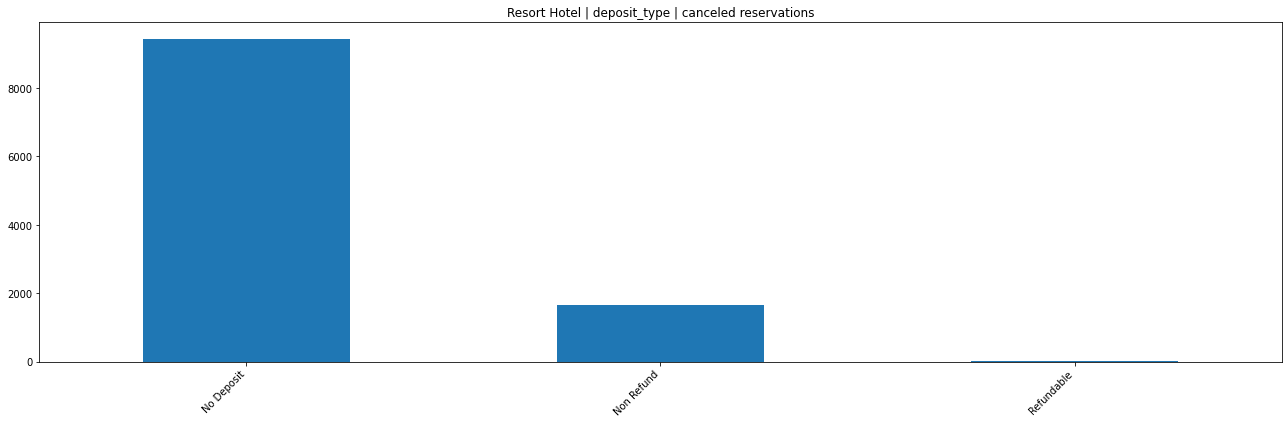

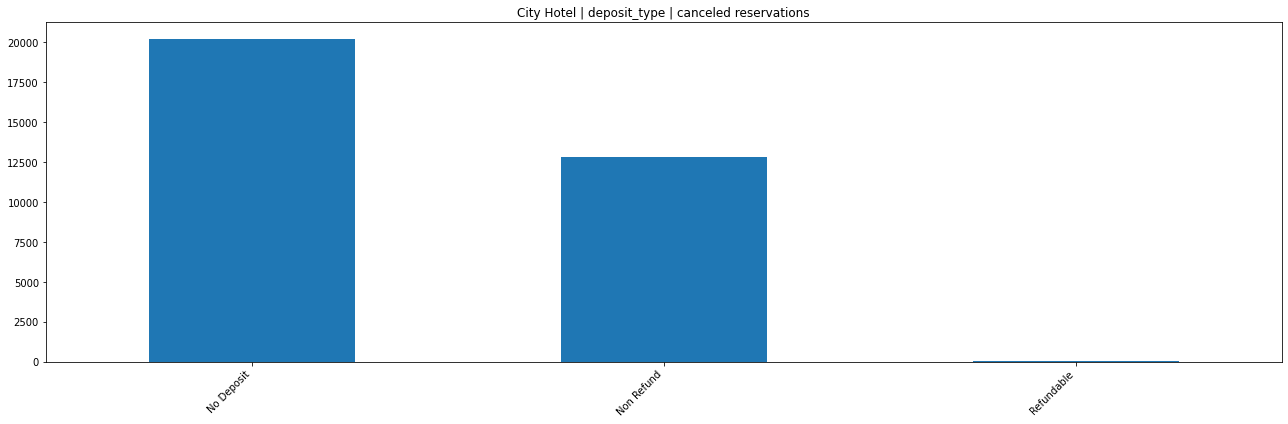

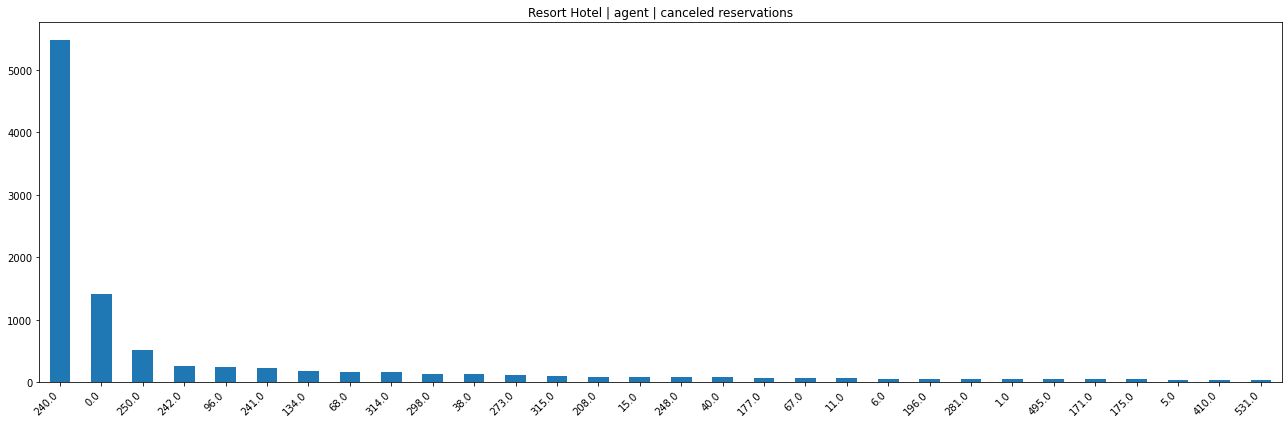

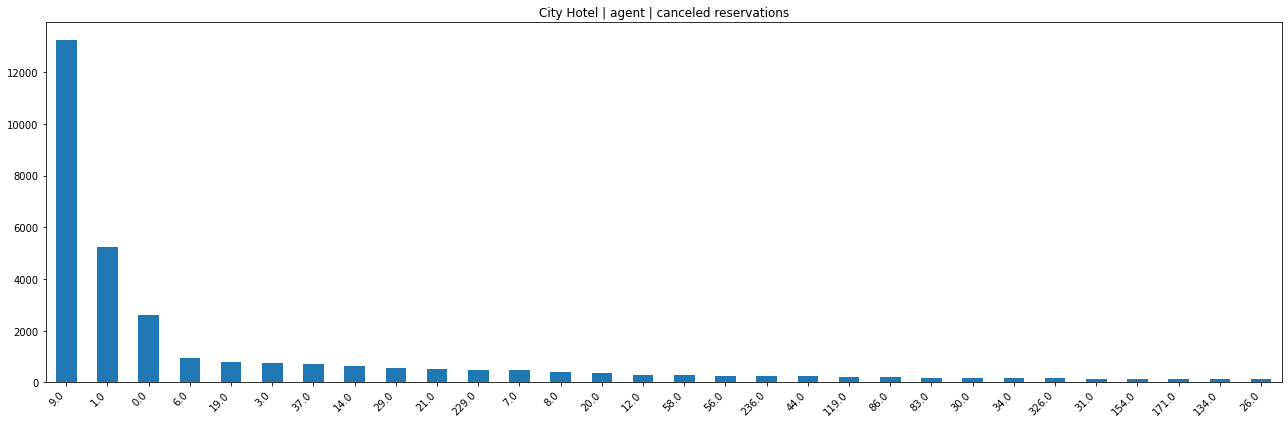

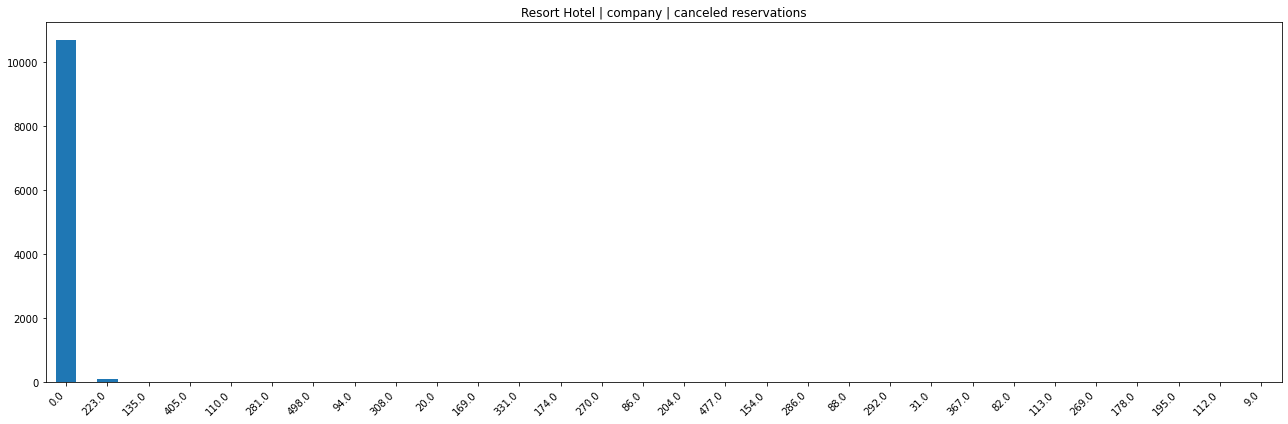

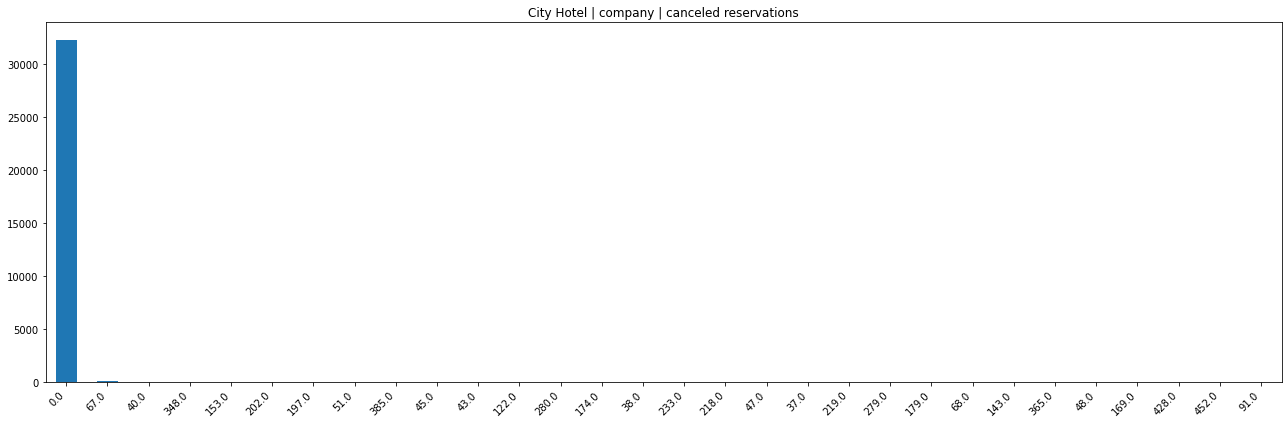

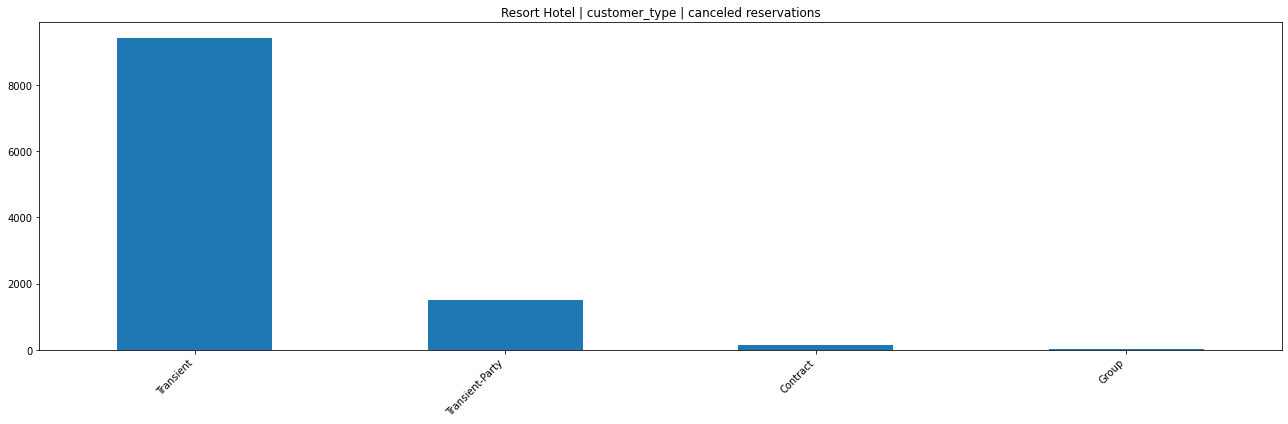

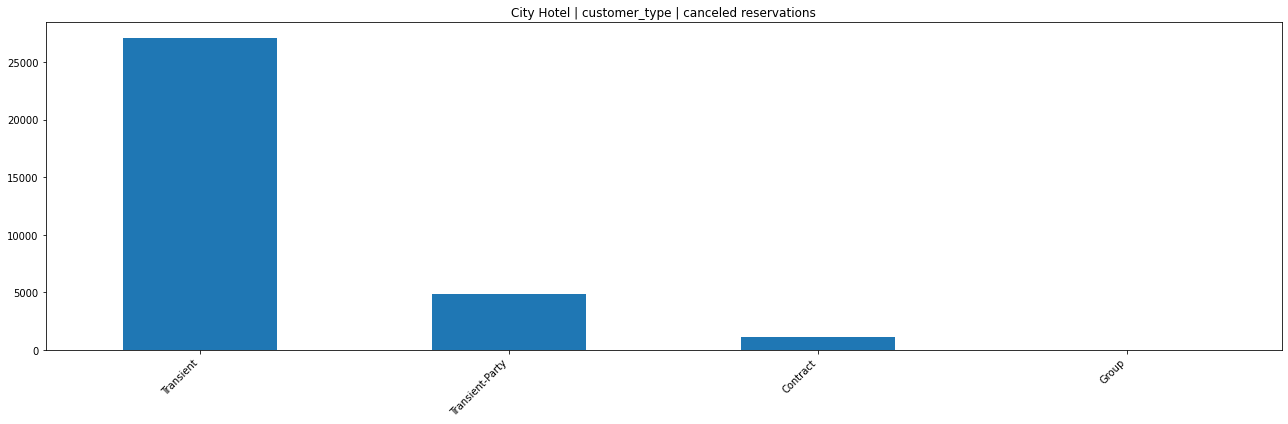

In [11]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
         'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
         'deposit_type', 'agent', 'company', 'customer_type']

def freq_attributes(canceled, attributes):
    hotels = dataset.hotel.unique()
        
    for attr in attributes:
        for h in hotels:            
            counts = dataset.loc[(dataset.hotel == h) & (dataset.is_canceled == (1 if canceled else 0)), attr].value_counts()
            
            plt.figure(figsize = (18, 6))
            ax = counts.head(30).plot(kind = 'bar', label = attr)
            ax.set_title(h + ' | ' + attr + (' | canceled reservations' if canceled else ''))
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
            plt.tight_layout()
            plt.show()
        
freq_attributes(True, attrs)

**From which countries did the guests come?**

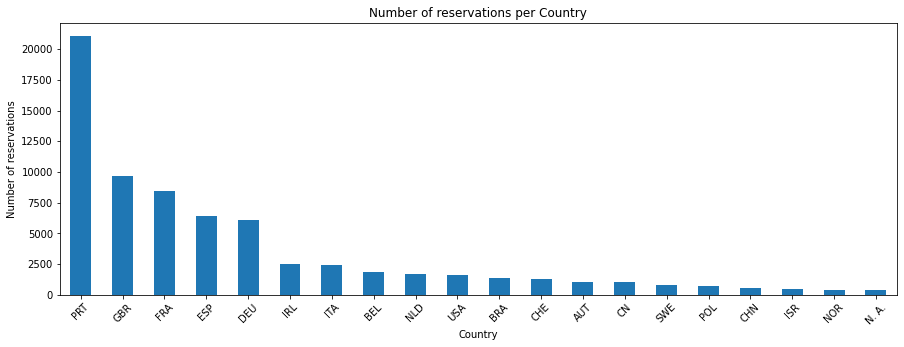

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
MRT        1
MMR        1
MLI        1
MDG        1
PLW        1
Name: country, Length: 166, dtype: int64

In [12]:
def show_countries():
    countries = dataset[dataset.is_canceled == 0].groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number of reservations per Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of reservations')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    plt.xticks(rotation = 45)
    plt.show()
    
    return countries

show_countries()

**From wich country were the guests who canceled their reservations the most?**

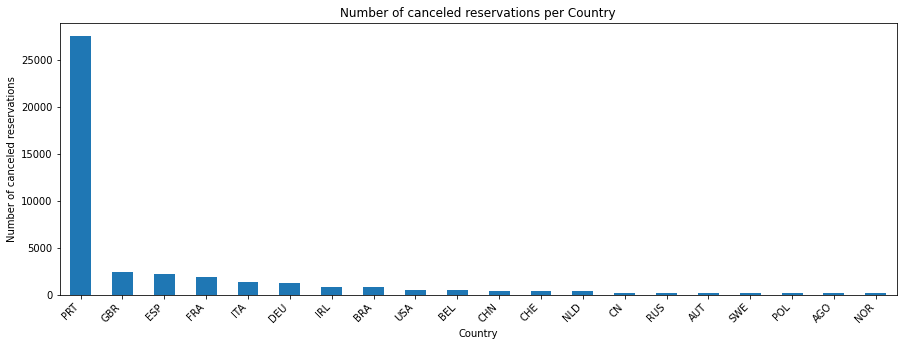

country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
       ...  
UMI        1
FJI        1
SYC        1
ETH        1
NIC        1
Name: country, Length: 128, dtype: int64

In [13]:
def show_countries_canceled():
    countries = dataset[dataset.is_canceled == 1].groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number of canceled reservations per Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of canceled reservations')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    plt.show()
    
    return countries

show_countries_canceled()

**What are the months with the most guests in each hotel?**

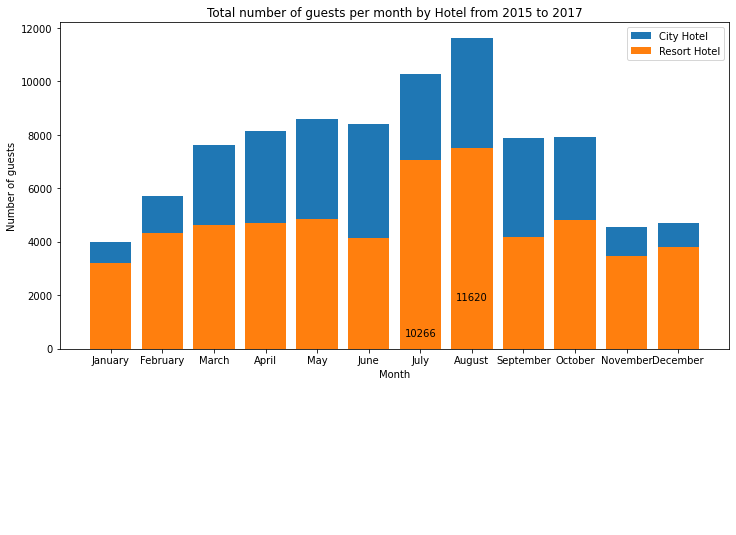

,month,hotel,guests
8,January,City Hotel,4002
9,January,Resort Hotel,3184
6,February,City Hotel,5723
7,February,Resort Hotel,4306
15,March,Resort Hotel,4611
14,March,City Hotel,7634
0,April,City Hotel,8146
1,April,Resort Hotel,4687
17,May,Resort Hotel,4863
16,May,City Hotel,8579


In [14]:
def guests_month():
    info = ['arrival_date_month', 'hotel', 'is_canceled', 'adults', 'children', 'babies']
    guests = dataset.loc[dataset.is_canceled == 0, info]
    guests['total_guests'] = guests.adults + guests.children + guests.babies
    guests.total_guests = guests.total_guests.astype(int)
    
    guests = guests.groupby(['arrival_date_month', 'hotel']) \
                   .aggregate({'total_guests' : sum}) \
                   .reset_index()
    
    guests.columns = ['month', 'hotel', 'guests']
        
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
        
    guests.month = pd.Categorical(guests.month, categories = months, ordered = True)
    
    guests.sort_values('month', inplace = True)
    
    hotels = guests.hotel.unique()
    fig, ax = plt.subplots(figsize = (12, 6))
    bars = []
        
    for i in range(len(hotels)):
        bars.append(ax.bar(guests.loc[guests.hotel == hotels[i], 'month'], \
                           guests.loc[guests.hotel == hotels[i], 'guests'], \
                           label = hotels[i]))
        auto_label(ax, bars[i])
        
    anos = dataset.arrival_date_year.unique()
    plt.title(f'Total number of guests per month by Hotel from {min(anos)} to {max(anos)}')
    plt.xlabel('Month')
    plt.ylabel('Number of guests')
    plt.legend()
    plt.show()
    
    return guests

guests_month()

**What are the average prices for each person per night by hotel?**

In [15]:
def average_daily_rate_person():
    for h in dataset.hotel.unique():
        print(f'Average daily rate per person: {dataset[dataset.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


**What is the average stay in days?**

In [16]:
def average_stay_days():
    stay = dataset.loc[dataset.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay

average_stay_days()

,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


**Show heatmap of correlation between attributes to find the most important one!**

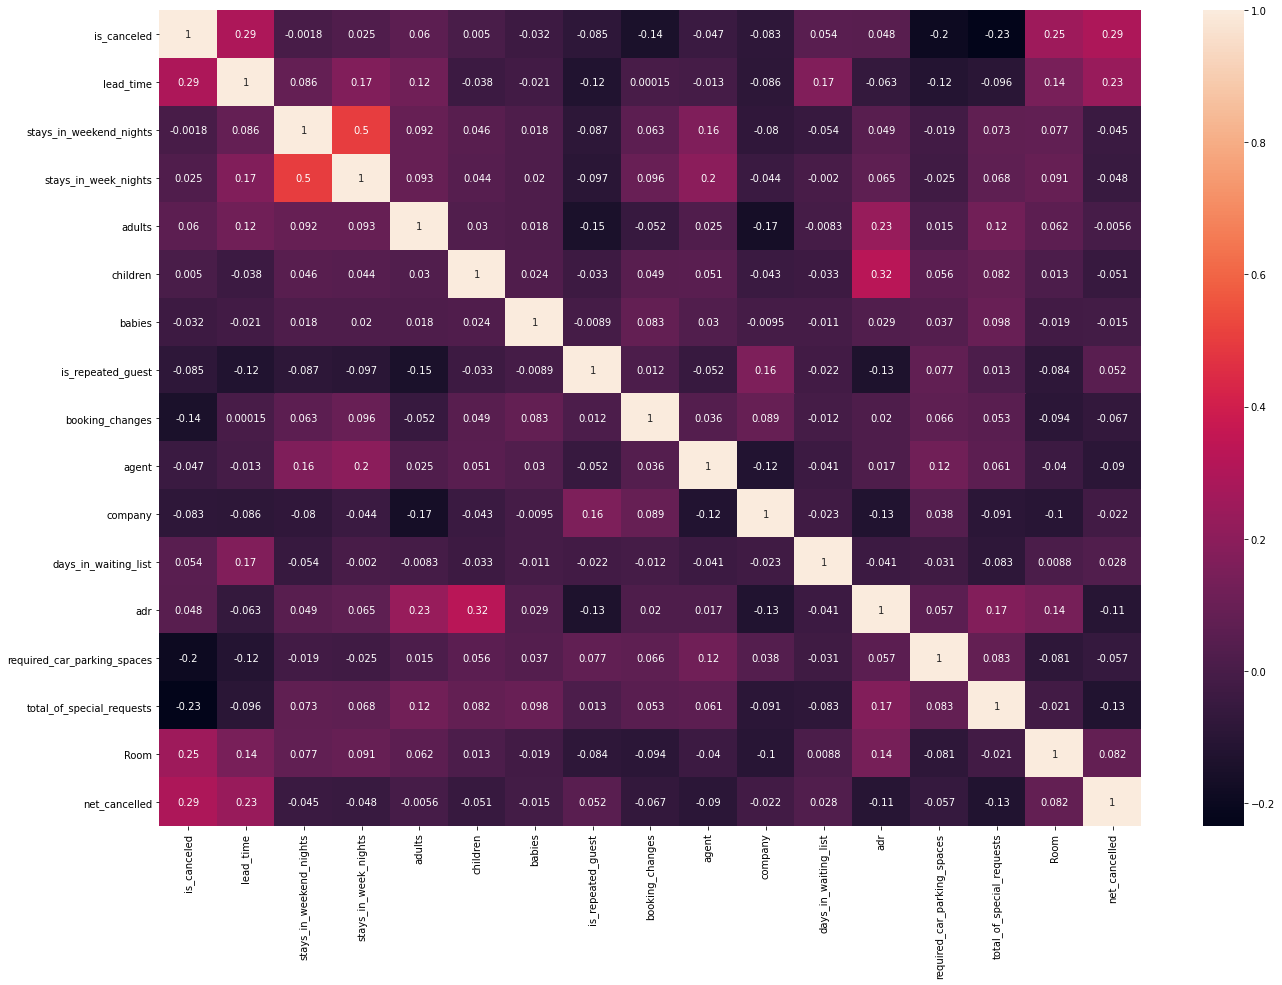

In [17]:
# Copy the dataframe
df_subset = dataset.copy()

# Remove reservation_status column, because it tells us if booking was cancelled  
df_subset = df_subset.drop(['reservation_status'], axis=1)

# Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1

# Make the new column which contain 1 if the guest has cancelled more booking in the past than the number of booking he did not cancel, otherwise 0
df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

# Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','previous_cancellations','previous_bookings_not_canceled'],axis=1)

# Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

**Show number of actual guests by country**

In [18]:
country_data = pd.DataFrame(dataset.loc[dataset['is_canceled'] == 0]['country'].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data['Number of Guests'].sum()
country_data['Guests in %'] = round(country_data['Number of Guests'] / total_guests * 100, 2)
country_data['country'] = country_data.index
# creating a pie chart
fig = px.pie(country_data,
             values="Number of Guests",
             names='country',
             title='Home country of guests',
             template='seaborn')


fig.update_traces(textposition='inside',textinfo='value+percent+label')
fig.show()

**Creating a map which shows the distribution of guest in around of the world**

In [19]:
guest_map = px.choropleth(country_data,
                          locations=country_data.index,
                          color=country_data['Guests in %'],
                          hover_name = country_data.index,
                          color_continuous_scale=px.colors.sequential.Cividis_r,
                          title='Home Country Of Guests')
guest_map.show()

**After data cleaning, separate Resort and City hotel for easier analyses. only bookings that were not canceled are included**

In [20]:
resort_hotel = dataset.loc[(dataset['hotel'] == 'Resort Hotel') & (dataset['is_canceled'] == 0)]
city_hotel = dataset.loc[(dataset['hotel'] == 'City Hotel') & (dataset['is_canceled'] == 0)]

In [21]:
resort_hotel['adr_pp'] = resort_hotel['adr'] / (resort_hotel['adults'] + resort_hotel['children'])
city_hotel['adr_pp'] = city_hotel['adr'] / (city_hotel['adults'] + city_hotel['children'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
print("""From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} $ per night and person.
City hotel: {:.2f} $ per night and person."""
     .format(resort_hotel['adr_pp'].mean(), city_hotel['adr_pp'].mean()))

From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: inf $ per night and person.
City hotel: inf $ per night and person.


**Create a figure to show the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels**

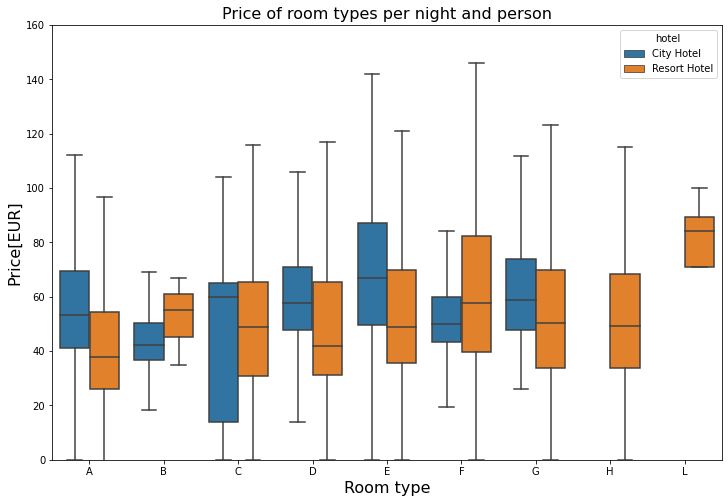

In [23]:
dataset['adr_pp'] = dataset['adr'] / (dataset['adults'] + dataset['children'])
data_no_cancel = dataset.loc[dataset['is_canceled'] == 0]
room_prices = data_no_cancel[['hotel', 'reserved_room_type', 'adr_pp']].sort_values('reserved_room_type')

# boxplot:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y='adr_pp',
            hue='hotel',
            data= room_prices,
            hue_order=['City Hotel', 'Resort Hotel'],
            fliersize=0)

plt.title('Price of room types per night and person', fontsize=16)
plt.xlabel('Room type', fontsize=16)
plt.ylabel('Price[EUR]', fontsize=16)
plt.ylim(0,160)
plt.show()

In [24]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

**Create dataFrames with relevant data**

In [25]:
resort_guests_monthly = resort_hotel.groupby('arrival_date_month')['hotel'].count()
city_guests_monthly = city_hotel.groupby('arrival_date_month')['hotel'].count()

resort_guest_data = pd.DataFrame({'month': list(resort_guests_monthly.index), 
                                  'hotel': 'Resort hotel', 'guests': list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({'month': list(city_guests_monthly.index),
                                 'hotel': 'City hotel', 'guests': list(city_guests_monthly.values)})

full_guest_data = pd.concat([resort_guest_data, city_guest_data], ignore_index = True)

In [26]:
resort_hotel['total_nights'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']
city_hotel['total_nights'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
num_night_rh = list(resort_hotel['total_nights'].value_counts().index)
num_booking_rh = list(resort_hotel['total_nights'].value_counts())
rel_booking_rh = resort_hotel['total_nights'].value_counts() / sum(num_booking_rh) * 100

num_night_ch = list(city_hotel['total_nights'].value_counts().index)
num_booking_ch = list(city_hotel['total_nights'].value_counts())
rel_booking_ch = city_hotel['total_nights'].value_counts() / sum(num_booking_ch) * 100

In [28]:
rh_night = pd.DataFrame({'hotel': 'Resort hotel', 'Number of nights': num_night_rh, 
                         'rel_num_booking': rel_booking_rh})

ch_night = pd.DataFrame({'hotel': 'City hotel', 'Number of nights': num_night_ch,
                         'rel_num_booking': rel_booking_ch})

full_night = pd.concat([rh_night, ch_night], ignore_index = True)

**Show lenght of stay in both kind of hotels**

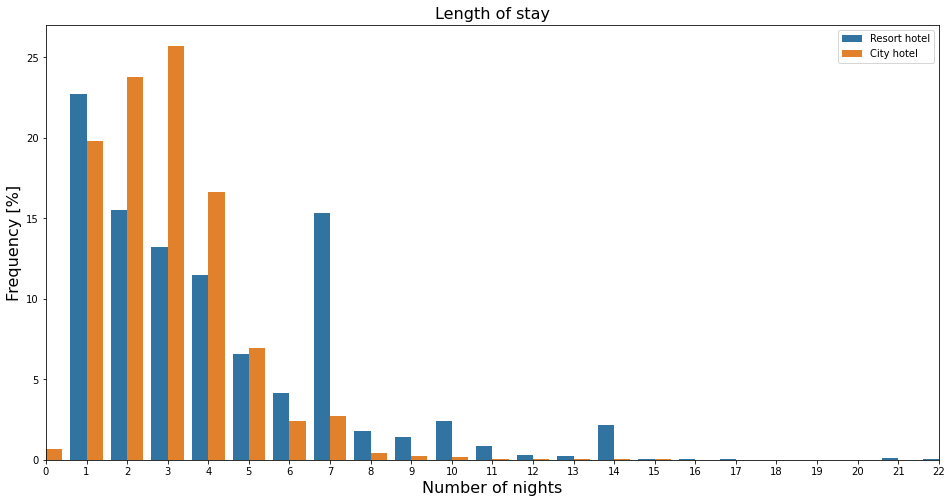

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(data = full_night,
            x = 'Number of nights',
            y = 'rel_num_booking',
            hue = 'hotel')

plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Frequency [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [30]:
avg_nights_rh = sum(list((rh_night["Number of nights"] * (rh_night["rel_num_booking"]/100)).values))
avg_nights_ch = sum(list((ch_night["Number of nights"] * (ch_night["rel_num_booking"]/100)).values))



print(f"On average, guests of the City hotel stay {avg_nights_ch:.2f} nights, and {ch_night['Number of nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_rh:.2f} nights, and {rh_night['Number of nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.92 nights, and 57 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


**Do bookings cancellation impacted by any other factors?**

Text(0, 0.5, 'Cancellation Count')

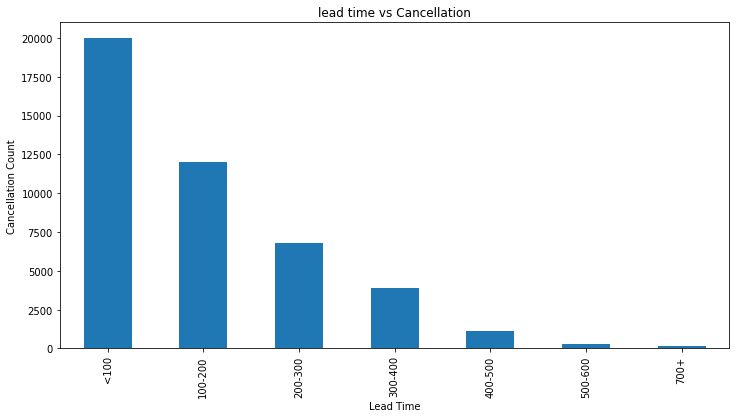

In [31]:
dataset['lead_time'].max()
dataset['lead_time_group'] = pd.cut(dataset['lead_time'].dropna(),
                         [0,100,200,300,400,500,600,700],
                         labels=['<100','100-200','200-300','300-400','400-500', '500-600','700+'], include_lowest=True)
plt.figure(figsize=(12,6))
dataset_filtered = dataset[dataset['is_canceled'] == 1]
dataset_filtered.groupby('lead_time_group')['hotel'].count().plot.bar(title = 'lead time vs Cancellation')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Count')

**Which is the best time in a year to book a hotel?**

Text(0.5, 1.0, 'Month vs No of Bookings')

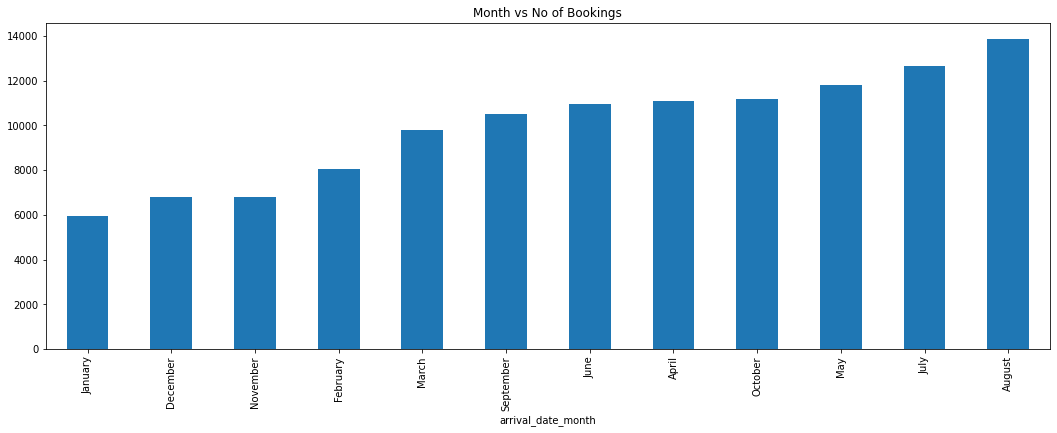

In [32]:
plt.figure(figsize=(18,6))
dataset.groupby(['arrival_date_month'])['hotel'].count().sort_values().plot.bar()
plt.title('Month vs No of Bookings')

**By which market segment the maximum number of bookings made?**

Text(0.5, 1.0, 'Market segment vs Bookings count')

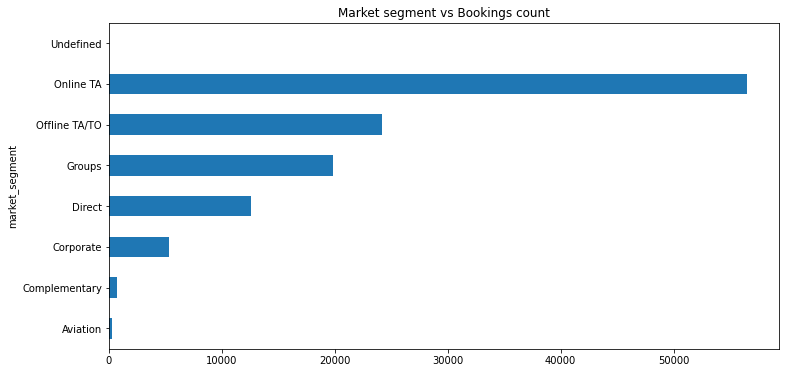

In [33]:
dataset.groupby('market_segment')['hotel'].count().plot.barh(figsize=(12,6))
plt.title('Market segment vs Bookings count')

**Which method/platform is mostly used for hotel bookings?**

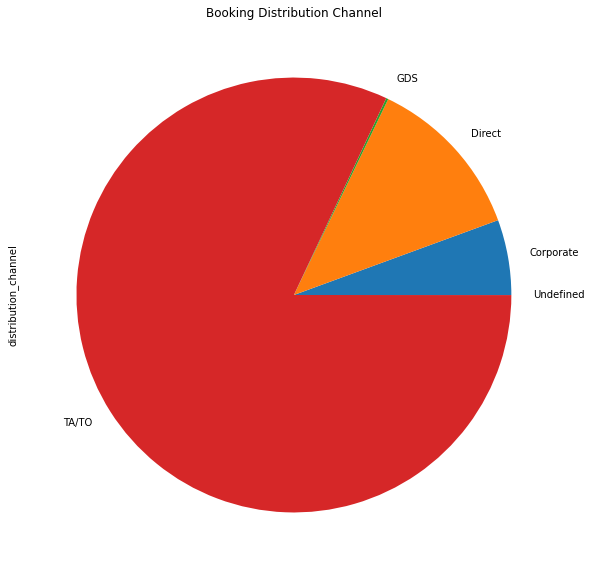

In [34]:
dataset.groupby('distribution_channel')['distribution_channel'].count().plot.pie(title='Booking Distribution Channel', figsize=(10, 10))

**What type of meals combo was highly preferred by the people?**

Text(0, 0.5, 'Count')

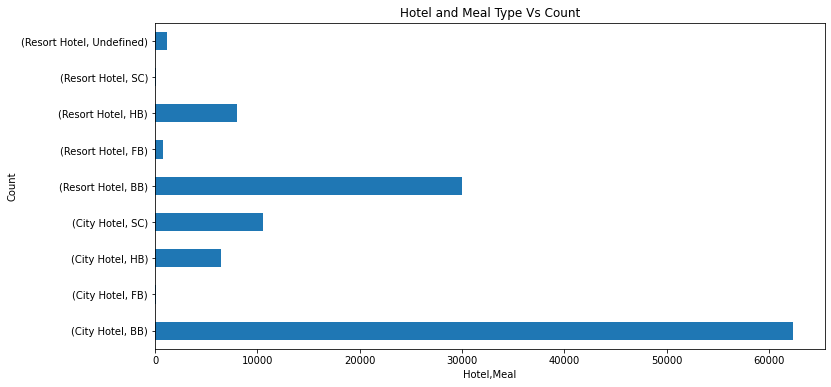

In [35]:
plt.figure(figsize=(12,6))
dataset.groupby(['hotel','meal'])['hotel'].count().plot.barh(title='Hotel and Meal Type Vs Count')
plt.xlabel("Hotel,Meal")
plt.ylabel("Count")

**Which type of room is preferred by people at the time of booking?**

Text(0, 0.5, 'Count')

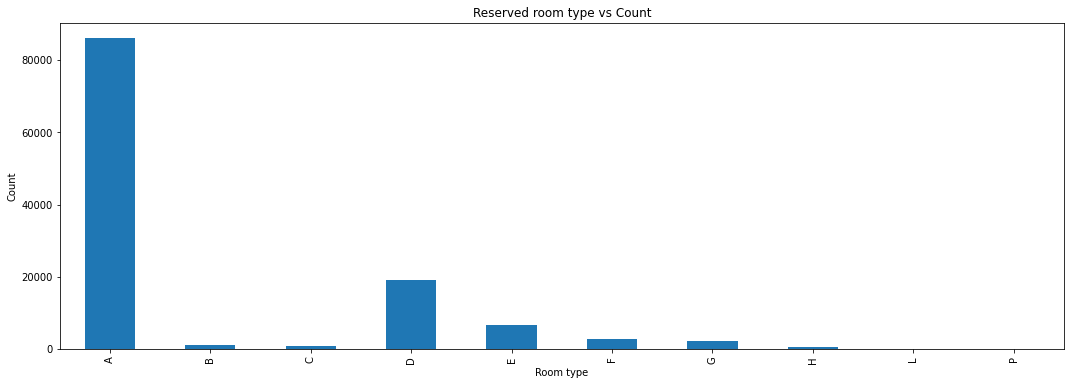

In [36]:
plt.figure(figsize=(18,6))
dataset.groupby('reserved_room_type')['hotel'].count().plot.bar()
plt.title('Reserved room type vs Count')
plt.xlabel('Room type')
plt.ylabel('Count')

**Does everyone has been allocated same room type chosen by them at the time of booking during their check-in's ?**

In [37]:
dataset['reserved_assigned_status'] = (dataset['reserved_room_type']==dataset['assigned_room_type']).astype(int)
pd.crosstab(dataset['hotel'],dataset['reserved_assigned_status'], margins=True)

reserved_assigned_status,0,1,All
hotel,,,
City Hotel,7192,72138,79330
Resort Hotel,7725,32335,40060
All,14917,104473,119390


# Part II

**Here i want to predict cancelation occurance with machine learning approachs**

In [38]:
dataset.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293123
reserved_assigned_status          0.247770
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
adr_pp                            0.017808
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [39]:
variables = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables]

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_canceled
0,342,0,0,3,0,0
1,737,0,0,4,0,0
2,7,0,0,0,0,0
3,13,0,0,0,0,0
4,14,1,0,0,0,0
...,...,...,...,...,...,...
119385,23,0,0,0,0,0
119386,102,2,0,0,0,0
119387,34,4,0,0,0,0
119388,109,0,0,0,0,0


In [40]:
model = GaussianNB()

#using KFold validation to try to increase the accuracy
def kfold_validation(dataset, variables, k, shuffle = False):
    i = 1

    kfold = KFold(n_splits = k, shuffle = shuffle)

    for i_train, i_test in kfold.split(dataset):
        data = dataset.loc[i_train, variables[:-1]]
        target = dataset.loc[i_train, variables[-1]]

        model.fit(data, target)

        data = dataset.loc[i_test, variables[:-1]]
        target = dataset.loc[i_test, variables[-1]]

        predicted = model.predict(data)

        print(53 * '-' + f'\nFold {i} | train: {len(i_train)} | test: {len(i_test)}')
        print(metrics.classification_report(target, predicted))
        print(metrics.confusion_matrix(target, predicted))

        i += 1
        
    return kfold

kfold_validation(dataset, variables, 10)

-----------------------------------------------------
Fold 1 | train: 107451 | test: 11939
              precision    recall  f1-score   support

           0       0.58      0.31      0.40      3672
           1       0.75      0.90      0.82      8267

    accuracy                           0.72     11939
   macro avg       0.67      0.61      0.61     11939
weighted avg       0.70      0.72      0.69     11939

[[1129 2543]
 [ 801 7466]]
-----------------------------------------------------
Fold 2 | train: 107451 | test: 11939
              precision    recall  f1-score   support

           0       0.95      0.26      0.41      9115
           1       0.29      0.96      0.44      2824

    accuracy                           0.42     11939
   macro avg       0.62      0.61      0.42     11939
weighted avg       0.79      0.42      0.42     11939

[[2368 6747]
 [ 122 2702]]
-----------------------------------------------------
Fold 3 | train: 107451 | test: 11939
              preci

KFold(n_splits=10, random_state=None, shuffle=False)

In [41]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.90      0.18      0.30     75166
           1       0.41      0.97      0.58     44224

    accuracy                           0.47    119390
   macro avg       0.66      0.57      0.44    119390
weighted avg       0.72      0.47      0.40    119390

[[13594 61572]
 [ 1479 42745]]


In [42]:
variables = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables[:-1]]

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
0,342,0,0,3,0
1,737,0,0,4,0
2,7,0,0,0,0
3,13,0,0,0,0
4,14,1,0,0,0
...,...,...,...,...,...
119385,23,0,0,0,0
119386,102,2,0,0,0
119387,34,4,0,0,0
119388,109,0,0,0,0


In [43]:
pca = PCA()

pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
transformed = pca.fit_transform(dataset[variables[:-1]])
transformed

array([[ 2.37988826e+02, -3.31190162e-01, -1.43449503e-01,
         2.79470960e+00, -6.43904207e-02],
       [ 6.32988622e+02, -7.47244135e-01,  1.55843031e-01,
         3.73990103e+00,  7.46833553e-03],
       [-9.70110030e+01,  1.86410150e-01, -6.39284836e-01,
        -1.38017501e-01, -6.75825317e-02],
       ...,
       [-7.00138575e+01, -1.01608407e+00,  3.15852761e+00,
        -6.64613478e-01, -1.53938984e-01],
       [ 4.98894406e+00,  9.87427579e-02, -5.91039764e-01,
        -1.49675840e-01, -4.20964328e-02],
       [ 1.00987474e+02, -5.73411802e-01,  1.34688821e+00,
        -4.22403368e-01, -6.46609027e-02]])

In [45]:
len(pca.components_)
sum(pca.explained_variance_ratio_[0:1])

0.9998410678413086

In [46]:
dataset_pca = pd.DataFrame(transformed)
dataset_pca.drop([1, 2, 3, 4], axis = 1, inplace = True)
dataset_pca

,0
0,237.988826
1,632.988622
2,-97.011003
3,-91.011006
4,-90.011717
...,...
119385,-81.011011
119386,-2.012473
119387,-70.013857
119388,4.988944


In [47]:
dataset_pca['is_canceled'] = dataset['is_canceled']
dataset_pca.is_canceled

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [48]:
dataset_pca.columns = ['pc1', 'is_canceled']

dataset_pca

,pc1,is_canceled
0,237.988826,0
1,632.988622,0
2,-97.011003,0
3,-91.011006,0
4,-90.011717,0
...,...,...
119385,-81.011011,0
119386,-2.012473,0
119387,-70.013857,0
119388,4.988944,0


In [49]:
len(dataset) == len(dataset_pca)
print(f'dataset -> {dataset[variables].shape}\ndataset_pca -> {dataset_pca.shape}')
variables = list(dataset_pca.columns)


dataset -> (119390, 6)
dataset_pca -> (119390, 2)


In [50]:
model = GaussianNB()

kfold_validation(dataset_pca, variables, 10, False)

-----------------------------------------------------
Fold 1 | train: 107451 | test: 11939
              precision    recall  f1-score   support

           0       0.30      0.80      0.43      3672
           1       0.63      0.15      0.25      8267

    accuracy                           0.35     11939
   macro avg       0.46      0.48      0.34     11939
weighted avg       0.53      0.35      0.30     11939

[[2930  742]
 [6988 1279]]
-----------------------------------------------------
Fold 2 | train: 107451 | test: 11939
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      9115
           1       0.67      0.40      0.50      2824

    accuracy                           0.81     11939
   macro avg       0.75      0.67      0.69     11939
weighted avg       0.80      0.81      0.79     11939

[[8559  556]
 [1697 1127]]
-----------------------------------------------------
Fold 3 | train: 107451 | test: 11939
              preci

KFold(n_splits=10, random_state=None, shuffle=False)

In [51]:
data = dataset_pca[variables[:-1]]
target = dataset_pca[variables[-1]]
predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76     75166
           1       0.57      0.33      0.42     44224

    accuracy                           0.66    119390
   macro avg       0.63      0.59      0.59    119390
weighted avg       0.64      0.66      0.63    119390

[[64032 11134]
 [29587 14637]]


In [52]:
variables = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables[:-1]]

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
0,342,0,0,3,0
1,737,0,0,4,0
2,7,0,0,0,0
3,13,0,0,0,0
4,14,1,0,0,0
...,...,...,...,...,...
119385,23,0,0,0,0
119386,102,2,0,0,0
119387,34,4,0,0,0
119388,109,0,0,0,0


In [53]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 20, n_jobs = -1, 
                               random_state = 0, bootstrap = True)

kfold_validation(dataset, variables, 10, True)

-----------------------------------------------------
Fold 1 | train: 107451 | test: 11939
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      7548
           1       0.72      0.59      0.65      4391

    accuracy                           0.76     11939
   macro avg       0.75      0.73      0.73     11939
weighted avg       0.76      0.76      0.76     11939

[[6533 1015]
 [1811 2580]]
-----------------------------------------------------
Fold 2 | train: 107451 | test: 11939
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      7535
           1       0.72      0.58      0.64      4404

    accuracy                           0.76     11939
   macro avg       0.75      0.72      0.73     11939
weighted avg       0.76      0.76      0.76     11939

[[6545  990]
 [1853 2551]]
-----------------------------------------------------
Fold 3 | train: 107451 | test: 11939
              preci

KFold(n_splits=10, random_state=None, shuffle=True)

In [54]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     75166
           1       0.74      0.60      0.66     44224

    accuracy                           0.77    119390
   macro avg       0.76      0.74      0.74    119390
weighted avg       0.77      0.77      0.77    119390

[[65639  9527]
 [17737 26487]]
